In [1]:
%%html
<style>
.code_cell .run_this_cell {
    display: none;
}
</style>

After meeting on Tuesday 12 May 2020:

To do:
* [ ] take duration from fixation cross to cue onset as baseline signal
* [ ] choose one value of C and M that satisfy general classification
* [ ] ppt and word


Etc, personal:
* [ ] The code is too long, create separate ipynb files
* [ ] generalize the code
* [ ] create function that save figure with C and m values
* [ ] try os.path variable to create pathname
___

In [2]:
%autosave 5

Autosaving every 5 seconds


---
This file will use the train_test_split function provided in sklearn_metrics  
Thus splitting training and testing data will not be performed manually  
___
In addition to that the overlapping data will be performed before CSP calculation
The amount of overlapping performed on the data are:
1. 10%
2. 50%
3. 90%


# BCI Competition IV Dataset 2a (.npz data)
<p>
Information Given in Documentation

From the documentation it is known that:
<li>25 electrodes are used, first 22 are EEG, last 3 are EOG
<li>Sampling frequency (fs) is 250Hz
<li>9 subjects
<li>9 run (run 1-3 are for eye movement, run 4-9 is MI)

<b> -- Time Duration-- </b>

1 trials                          = 7-8s  
1 run              = 48 trials    = 336-384s  
1 session = 6 runs = 288 trials   = 2016-2304s

About the recording of eye movement
<li>run 1 => 2 mins with eyes open
<li>run 2 => 1 min with eyes closed
<li>run 3 => 1 min with eye movements

## Visualizing/ Preparing the Data 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import pandas as pd
from pandas import DataFrame as dframe

In [4]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [5]:
# np.set_printoptions(precision=30, suppress=True)

In [6]:
# number of subject
ns = 9

In [7]:
# Load the training data of subject 01
data01 = np.load('./datasets/A01T.npz')
data02 = np.load('./datasets/A02T.npz')
data03 = np.load('./datasets/A03T.npz')
data04 = np.load('./datasets/A04T.npz')
data05 = np.load('./datasets/A05T.npz')
data06 = np.load('./datasets/A06T.npz')
data07 = np.load('./datasets/A07T.npz')
data08 = np.load('./datasets/A08T.npz')
data09 = np.load('./datasets/A09T.npz')

In [8]:
type(data01)

numpy.lib.npyio.NpzFile

In [9]:
# Keys available inside data are
data01.files

['s', 'etyp', 'epos', 'edur', 'artifacts']

In [10]:
data09['artifacts'].shape # Containing artifacts occurent in each event in all runs of a subject

(288, 1)

In [11]:
dframe(data09['artifacts'])

,0
0,1
1,0
2,0
3,1
4,1
...,...
283,0
284,0
285,0
286,0


In [12]:
# Create table with three columns of 'etyp', 'epos', 'edur' respectively
# Name this table property
prop01 = np.c_[data01['etyp'], data01['epos'], data01['edur']]
prop02 = np.c_[data02['etyp'], data02['epos'], data02['edur']]
prop03 = np.c_[data03['etyp'], data03['epos'], data03['edur']]
prop04 = np.c_[data04['etyp'], data04['epos'], data04['edur']]
prop05 = np.c_[data05['etyp'], data05['epos'], data05['edur']]
prop06 = np.c_[data06['etyp'], data06['epos'], data06['edur']]
prop07 = np.c_[data07['etyp'], data07['epos'], data07['edur']]
prop08 = np.c_[data08['etyp'], data08['epos'], data08['edur']]
prop09 = np.c_[data09['etyp'], data09['epos'], data09['edur']]

In [13]:
prop01.shape

(603, 3)

In [14]:
pd.__version__

'1.0.3'

In [15]:
pd.options.display.max_rows = None

In [16]:
dframe(prop02, columns=['etype', 'epos','edur'])

,etype,epos,edur
0,32766,1,0
1,276,1,31512
2,32766,31514,0
3,277,31514,26088
4,32766,57603,0
5,1072,57603,38556
6,32766,96160,0
7,768,96510,1875
8,769,97010,313
9,768,98513,1875


In [17]:
# Store all 's' data into sample_data
sample_data01 = dframe(data01['s'])
sample_data02 = dframe(data02['s'])
sample_data03 = dframe(data03['s'])
sample_data04 = dframe(data04['s'])
sample_data05 = dframe(data05['s'])
sample_data06 = dframe(data06['s'])
sample_data07 = dframe(data07['s'])
sample_data08 = dframe(data08['s'])
sample_data09 = dframe(data09['s'])

In [18]:
# Remove the last 3 electrodes (EOG electrodes)
sample_data01 = sample_data01.iloc[:, 0:22]
sample_data02 = sample_data02.iloc[:, 0:22]
sample_data03 = sample_data03.iloc[:, 0:22]
sample_data04 = sample_data04.iloc[:, 0:22]
sample_data05 = sample_data05.iloc[:, 0:22]
sample_data06 = sample_data06.iloc[:, 0:22]
sample_data07 = sample_data07.iloc[:, 0:22]
sample_data08 = sample_data08.iloc[:, 0:22]
sample_data09 = sample_data09.iloc[:, 0:22]

In [19]:
sample_data01.shape

(672528, 22)

In [20]:
# Showing inital value of sample_data
sample_data01.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-21.142578,-23.681641,-21.484375,-25.146484,-25.732422,-27.929688,-14.550781,-22.509766,-25.439453,-28.710938,...,-26.074219,-23.144531,-24.804688,-30.615234,-29.638672,-26.660156,-20.947266,-25.439453,-24.902344,-19.677734
1,-21.923828,-23.925781,-24.316406,-25.341797,-26.074219,-25.244141,-16.064453,-22.753906,-28.320312,-29.248047,...,-23.632812,-23.486328,-26.708984,-31.054688,-30.712891,-26.123047,-22.998047,-27.099609,-26.367188,-23.339844
2,-15.625000,-19.726562,-18.847656,-21.582031,-20.751953,-21.728516,-12.451172,-20.410156,-23.730469,-25.927734,...,-16.845703,-22.070312,-23.828125,-28.759766,-28.417969,-24.462891,-21.386719,-25.097656,-24.267578,-21.484375
3,-16.699219,-13.720703,-20.361328,-20.849609,-24.169922,-22.021484,-10.986328,-16.357422,-25.585938,-24.951172,...,-22.998047,-17.675781,-24.951172,-27.783203,-28.857422,-25.537109,-19.335938,-24.316406,-24.511719,-17.919922
4,-19.335938,-17.626953,-20.410156,-26.464844,-27.392578,-29.882812,-9.277344,-18.359375,-24.609375,-30.517578,...,-32.617188,-18.701172,-24.609375,-31.884766,-33.740234,-32.666016,-18.554688,-26.611328,-28.466797,-18.408203


In [21]:
# Sample data has shape of 67k~ samples
# This samples belong to total of all 9 runs with 48 trials of 4 different classes
for i in range(1, 10):
    var = 'sample_data0' + str(i)
    print(var, globals()[var].shape)

sample_data01 (672528, 22)
sample_data02 (677169, 22)
sample_data03 (660530, 22)
sample_data04 (600915, 22)
sample_data05 (686120, 22)
sample_data06 (678980, 22)
sample_data07 (681071, 22)
sample_data08 (675270, 22)
sample_data09 (673328, 22)


## Remove Artifact
According to the documentation we are interested to grab event type of 769, left class and 770, right class
But not some classes may contain artifacts

Inside data of each subject exists a 'artifacts' data which contains the information on each trial whether the data is clean, denoted by `0` or containing artifact, denoted by `1`

In [22]:
%run "./functions/removeArtifacts"

In [23]:
# Remove artifacts and take only event 769 (left) and 770 (right)
clean_ev01 = removeArtifacts(prop01, data01)
clean_ev02 = removeArtifacts(prop02, data02)
clean_ev03 = removeArtifacts(prop03, data03)
clean_ev04 = removeArtifacts(prop04, data04)
clean_ev05 = removeArtifacts(prop05, data05)
clean_ev06 = removeArtifacts(prop06, data06)
clean_ev07 = removeArtifacts(prop07, data07)
clean_ev08 = removeArtifacts(prop08, data08)
clean_ev09 = removeArtifacts(prop09, data09)

In [24]:
dframe(clean_ev05)

,0,1,2,3
0,770,107964,313,0
1,770,109882,313,0
2,769,111834,313,0
3,770,113842,313,0
4,769,115953,313,0
5,770,121851,313,0
6,769,125755,313,0
7,770,129622,313,0
8,769,131566,313,0
9,769,143829,313,0


## Taking index, position, and duration of each class of from clean data

In [25]:
# Take indexes whose 1st column are 769 (left) and 770 (right)
# Subject 1 - 9
for i in range(1, 10):
    idx_l = 'idx0' + str(i) + '_l'
    idx_r = 'idx0' + str(i) + '_r'
    clean_ev = globals()['clean_ev0' + str(i)]
    globals()[idx_l] = np.argwhere(clean_ev[:, 0]==769).flatten()
    globals()[idx_r] = np.argwhere(clean_ev[:, 0]==770).flatten()

In [26]:
idx05_l.shape, idx05_r.shape

((63,), (66,))

In [27]:
dframe(idx05_l).tail()

,0
58,123
59,124
60,125
61,126
62,128


In [28]:
# Take positions of corresponding event types
# Subject 01-09
for i in range(1, ns+1):
    pos_l = 'pos0' + str(i) + '_l'
    pos_r = 'pos0' + str(i) + '_r'
    clean_ev = globals()['clean_ev0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']

    globals()[pos_l] = clean_ev[idx_l, 1]
    globals()[pos_r] = clean_ev[idx_r, 1]

In [29]:
pos05_l.shape, pos05_r.shape

((63,), (66,))

In [30]:
# dframe(pos04_r)

In [31]:
# Take the duration of each event
# Subject 01-09
for i in range(1, ns+1):
    dur_l = 'dur0' + str(i) + '_l'
    dur_r = 'dur0' + str(i) + '_r'
    clean_ev = globals()['clean_ev0' + str(i)]
    idx_l = globals()['idx0' + str(i) + '_l']
    idx_r = globals()['idx0' + str(i) + '_r']
    
    globals()[dur_l] = clean_ev[idx_l, 2]
    globals()[dur_r] = clean_ev[idx_r, 2]    

In [32]:
dur09_l

array([313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 313,
       313])

In [33]:
# Duration of both events lasted for 313 samples, we can defined dur as
cue_dur = 313

Be aware that this duration is actually the duration of the cue, let's take a look at the event type table in datasheet
![event-type-table.png](./img/event-type-table.png)

The timing scheme of the paradigm suggest that the MI task last for about 2.75 since after the cue ends
![timing-scheme-paradigm.png](./img/timing-scheme-paradigm.png)

In [34]:
# The amount of sample to be clipped for 1 trial of left and right
sec = 2.75
fs = 250
mi_dur = round(sec * fs)
print('After the 313 samples cue, clip this amount of samples:', mi_dur)

After the 313 samples cue, clip this amount of samples: 688


## Fetch 688 samples of each event from sample_data, 72 trials each class

In [35]:
len(pos09_l)

53

In [36]:
# Fetch 688 samples of each event from sample_data
# Store them in E_left and E_right respectively, For convenience 'E' is used to imitate the variable used in paper
# Preparing the variables to store event samples of shape 72 x 688 x 22
# Subject 01-09
for i in range(1, ns+1):
    E_l = 'E0' + str(i) + '_left'
    E_r = 'E0' + str(i) + '_right'
    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    sample = globals()['sample_data0' + str(i)]
    
    globals()[E_l] = np.zeros([pos_l.shape[0], mi_dur, sample.shape[1]])
    globals()[E_r] = np.zeros([pos_r.shape[0], mi_dur, sample.shape[1]])

In [37]:
E04_left.shape, E04_right.shape

((62, 688, 22), (67, 688, 22))

In [38]:
pos04_r

array([ 38644,  46361,  48328,  50448,  58624,  62774,  74739,  76714,
        89144,  95200,  97163, 111090, 119594, 121512, 125472, 143196,
       157529, 165505, 167466, 173549, 177646, 181845, 193998, 216429,
       218347, 222307, 226335, 230316, 238087, 256444, 276588, 280771,
       282814, 286898, 290833, 321253, 327151, 338833, 340953, 351199,
       365244, 371316, 375515, 391674, 395642, 401595, 413969, 423986,
       437788, 452026, 462079, 478548, 482540, 486428, 492477, 494596,
       496502, 504931, 530536, 536631, 546949, 554806, 562915, 571276,
       577403, 579375, 597379])

In [39]:
# Now we are ready to take 688 samples of left and right
# Subject 01-09
for i in range(1, 10):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    sample = globals()['sample_data0' + str(i)]

    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    for j in range(E_l.shape[0]):
        E_l[j]=sample.iloc[pos_l[j]+cue_dur:pos_l[j]+cue_dur+mi_dur, :]
    for k in range(E_r.shape[0]):
        E_r[k]=sample.iloc[pos_r[k]+cue_dur:pos_r[k]+cue_dur+mi_dur, :]


In [40]:
# Creating columns for sample data
Xcol = []
for i in range(1, 23):
    if i < 11:
        Xcol.append('EEG0'+str(i))
    else:
        Xcol.append('EEG'+str(i))

In [41]:
E01_left.shape

(69, 688, 22)

In [42]:
dframe(E01_left[60], columns=Xcol)

,EEG01,EEG02,EEG03,EEG04,EEG05,EEG06,EEG07,EEG08,EEG09,EEG010,...,EEG13,EEG14,EEG15,EEG16,EEG17,EEG18,EEG19,EEG20,EEG21,EEG22
0,10.205078,7.128906,12.011719,10.498047,8.935547,6.054688,4.638672,4.248047,7.617188,5.078125,...,-0.976562,3.759766,4.589844,2.294922,4.833984,2.099609,2.197266,1.611328,1.220703,-1.074219
1,9.130859,5.273438,9.716797,9.423828,7.177734,4.980469,1.611328,2.783203,6.835938,5.322266,...,-1.611328,4.052734,5.859375,3.466797,5.126953,2.197266,5.273438,4.492188,3.613281,2.441406
2,0.683594,-0.781250,2.001953,5.078125,-0.341797,-1.611328,-2.783203,-0.927734,-0.097656,1.806641,...,-6.347656,1.269531,-0.439453,1.367188,-0.146484,-2.294922,0.390625,0.830078,0.195312,-0.146484
3,-0.341797,0.195312,4.101562,1.123047,-1.318359,-8.007812,1.074219,-0.146484,3.076172,0.292969,...,-7.128906,2.001953,4.296875,1.562500,2.441406,-0.244141,6.152344,5.468750,4.541016,6.396484
4,-8.349609,-5.419922,-2.539062,-4.882812,-10.205078,-14.648438,-5.859375,-4.931641,-2.490234,-4.492188,...,-14.746094,-0.537109,-0.537109,-1.708984,-4.003906,-8.007812,2.246094,0.927734,-0.878906,1.708984
5,-4.345703,-1.464844,2.343750,-0.439453,-3.710938,-7.910156,2.343750,0.439453,2.587891,0.048828,...,-8.349609,5.615234,5.322266,2.343750,2.343750,-0.488281,9.326172,7.812500,4.882812,8.593750
6,-0.732422,1.660156,4.589844,1.025391,-1.562500,-3.173828,4.785156,2.880859,4.003906,2.148438,...,-3.369141,7.958984,6.494141,4.589844,4.101562,1.074219,9.814453,8.203125,5.224609,6.542969
7,-5.810547,-3.710938,-0.341797,-2.636719,-6.103516,-7.617188,-1.464844,-1.171875,-1.220703,-2.294922,...,-12.158203,1.953125,0.878906,-1.123047,-2.685547,-4.785156,2.148438,0.830078,-1.855469,-2.490234
8,-1.904297,-3.027344,-1.220703,-0.488281,-3.027344,-2.001953,-0.634766,-1.025391,-1.611328,-1.611328,...,-5.566406,1.220703,0.097656,-2.001953,-0.878906,-2.050781,1.806641,0.976562,-1.220703,-1.806641
9,-2.099609,-6.054688,-3.320312,-2.246094,-5.029297,-3.808594,-4.101562,-4.882812,-4.101562,-4.443359,...,-4.296875,-2.539062,-3.125000,-3.759766,-3.906250,-4.394531,-3.466797,-4.248047,-5.761719,-6.982422


In [43]:
# First transform the dimension of array to N x T, i.e. electrodes x  samples
# Subject 01-09
for i in range(1, ns+1):
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    # try this:
    E_l_var = 'E0' + str(i) + '_left'
    E_r_var = 'E0' + str(i) + '_right'

    
    if (E_l.shape[0] != 22 and E_r.shape[0] !=22 ):
        globals()[E_l_var] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_var] = np.transpose(E_r, (0, 2, 1))

In [44]:
E09_left.shape, E09_right.shape

((53, 22, 688), (63, 22, 688))

In [45]:
dframe(E09_left[50]).head()

,0,1,2,3,4,5,6,7,8,9,...,678,679,680,681,682,683,684,685,686,687
0,-11.669922,-16.845703,-13.427734,-17.138672,-9.716797,-10.937500,-8.496094,-6.201172,-4.101562,0.097656,...,-16.650391,-16.064453,-15.820312,-12.500000,-6.982422,-0.634766,1.367188,5.126953,10.009766,7.519531
1,-8.496094,-9.228516,-8.642578,-7.324219,-3.271484,-2.832031,-0.048828,3.320312,0.537109,3.710938,...,-26.611328,-28.076172,-26.562500,-18.652344,-15.087891,-11.914062,-6.396484,-1.367188,3.222656,2.490234
2,-6.250000,-12.646484,-9.179688,-12.402344,-2.685547,-3.417969,-2.099609,-0.195312,-0.195312,3.271484,...,-22.802734,-21.679688,-20.214844,-16.357422,-12.060547,-6.884766,-2.880859,1.171875,6.591797,5.859375
3,-11.572266,-12.939453,-13.427734,-13.134766,-8.251953,-7.421875,-4.248047,-2.294922,-6.982422,-3.271484,...,-19.531250,-19.189453,-17.187500,-10.351562,-7.275391,-4.736328,0.488281,7.470703,13.623047,11.328125
4,-8.642578,-11.523438,-7.519531,-12.109375,-2.880859,-4.101562,-4.248047,-3.710938,-4.003906,-2.246094,...,-15.869141,-13.720703,-12.207031,-9.667969,-6.201172,-1.953125,0.195312,4.589844,9.619141,6.689453


## Perform Overlap on Data

![overlap-eq.png](./img/overlap_equation.png)

In [46]:
%run "./functions/overlap.ipynb"

In [47]:
help(overlap)

Help on function overlap in module __main__:

overlap(fs, E_data, overlap)
    This function will return array of overlapped data in sample domain
    Parameter: 
    fs : sampling frequency
    E_data : original EEG sample data, dimension of trial x electrode x samples
    overlap : % data to be overlapped



In [48]:
# Overlap for 90%
for i in range(1, ns+1):
    E_l_ol90 = 'E0' + str(i) + '_l_ol90'
    E_r_ol90 = 'E0' + str(i) + '_r_ol90'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    
    globals()[E_l_ol90] = overlap(250, E_l, 0.9)
    globals()[E_r_ol90] = overlap(250, E_r, 0.9)
    
# Overlap for 50%
for i in range(1, ns+1):
    E_l_ol50 = 'E0' + str(i) + '_l_ol50'
    E_r_ol50 = 'E0' + str(i) + '_r_ol50'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol50] = overlap(250, E_l, 0.5)
    globals()[E_r_ol50] = overlap(250, E_r, 0.5)
    
# Overlap for 10%
for i in range(1, ns+1):
    E_l_ol10 = 'E0' + str(i) + '_l_ol10'
    E_r_ol10 = 'E0' + str(i) + '_r_ol10'
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    globals()[E_l_ol10] = overlap(250, E_l, 0.1)
    globals()[E_r_ol10] = overlap(250, E_r, 0.1)

In [49]:
# The 250 samples data has to be clipped from the normal data in order to match the samples from overlap
for i in range(1,ns+1):
    E_left = globals()['E0' + str(i) + '_left']
    E_right = globals()['E0' + str(i) + '_right']

    E_l = 'E0' + str(i) + '_l'
    E_r = 'E0' + str(i) + '_r'
    
    globals()[E_l] = E_left[:, :, :fs]
    globals()[E_r] = E_right[:, :, :fs]

In [50]:
E01_l_ol90.shape, E01_r_ol90.shape

((1242, 22, 250), (1242, 22, 250))

In [51]:
E01_l_ol50.shape, E01_r_ol50.shape

((276, 22, 250), (276, 22, 250))

In [52]:
E01_l_ol10.shape, E01_r_ol10.shape

((138, 22, 250), (138, 22, 250))

In [53]:
E01_l.shape, E01_r.shape

((69, 22, 250), (69, 22, 250))

In [54]:
pd.options.display.max_columns = None

In [55]:
dframe(E01_l[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,18.115234,21.044922,18.847656,24.951172,16.699219,19.921875,18.359375,20.458984,19.384766,17.333984,22.070312,14.941406,14.208984,5.957031,3.271484,-4.052734,-7.421875,-11.230469,-8.984375,-10.595703,-4.296875,-7.226562,1.025391,-5.126953,-2.539062,-0.146484,-5.761719,-0.292969,1.025391,4.882812,1.123047,3.515625,6.738281,6.298828,5.712891,2.392578,-1.757812,-0.781250,0.634766,1.953125,-3.710938,-6.738281,-11.376953,-17.822266,-21.923828,-16.113281,-11.181641,-7.861328,-4.931641,-7.031250,-1.806641,2.050781,3.906250,8.740234,9.765625,10.644531,4.345703,6.982422,3.808594,4.882812,7.763672,6.933594,11.035156,6.298828,0.830078,1.660156,4.345703,4.296875,10.253906,13.232422,10.693359,10.693359,4.931641,8.398438,3.857422,7.324219,7.031250,13.525391,15.722656,11.718750,12.646484,11.523438,13.818359,11.279297,23.730469,20.312500,26.318359,23.632812,25.000000,27.050781,24.218750,25.439453,19.970703,25.634766,22.851562,22.216797,21.044922,18.505859,8.007812,6.054688,6.884766,9.667969,13.769531,17.675781,8.837891,11.669922,7.421875,7.763672,9.716797,7.128906,10.498047,6.494141,7.373047,3.515625,7.568359,-2.587891,-7.910156,-10.644531,-16.699219,-20.947266,-19.677734,-15.673828,-12.451172,-13.525391,-8.984375,-9.765625,-10.595703,-8.007812,-14.648438,-6.689453,-11.181641,-8.496094,-5.078125,-2.636719,0.048828,3.906250,1.708984,-2.294922,-10.986328,-12.988281,-11.376953,-7.861328,-4.101562,-6.689453,0.195312,-7.666016,-14.355469,-10.937500,-13.134766,-19.189453,-17.724609,-15.478516,-11.865234,-14.599609,-6.445312,-5.078125,-1.171875,-7.031250,-0.927734,-2.441406,-9.814453,-10.546875,-13.623047,-12.597656,-15.039062,-14.257812,-16.894531,-16.699219,-17.333984,-20.458984,-15.576172,-13.281250,-10.302734,-8.544922,-9.130859,-5.566406,-10.937500,-4.199219,-4.199219,0.976562,-0.439453,3.808594,-3.222656,-6.884766,-12.597656,-16.650391,-13.720703,-11.474609,-3.173828,-8.789062,-4.638672,-5.615234,-5.175781,-4.150391,0.585938,3.662109,6.347656,6.738281,2.490234,10.156250,7.958984,-2.001953,-4.101562,-5.273438,-7.275391,-11.328125,-16.406250,-22.119141,-24.316406,-27.880859,-25.634766,-11.279297,-5.224609,-5.517578,-0.976562,-0.097656,1.806641,5.078125,1.220703,-1.513672,-2.929688,-2.685547,-10.791016,-10.595703,-16.748047,-17.431641,-18.212891,-10.986328,-12.597656,-14.404297,-16.308594,-19.873047,-17.285156,-13.183594,-10.644531,-6.640625,-0.732422,1.953125,-2.294922,2.148438,3.076172,-6.347656,-7.666016,-4.589844,-5.859375,-8.935547,-5.566406,-3.466797,3.466797,-2.148438
1,15.917969,18.701172,19.628906,23.193359,16.796875,21.923828,18.115234,25.292969,21.289062,17.382812,22.705078,13.281250,14.648438,4.687500,5.224609,-2.001953,-3.173828,-8.007812,-2.343750,-5.126953,-1.220703,-1.220703,7.128906,-1.025391,0.585938,6.445312,-1.904297,3.320312,2.001953,8.837891,3.662109,8.935547,7.812500,10.107422,1.611328,1.074219,-4.199219,-2.978516,2.148438,5.761719,2.539062,2.441406,-4.785156,-8.886719,-16.162109,-11.621094,-4.882812,-3.320312,0.244141,2.294922,7.666016,12.451172,17.333984,18.701172,17.041016,13.720703,4.785156,5.761719,2.099609,5.175781,4.541016,2.587891,3.906250,

## Split train, test, then covariance

In [56]:
funcpath = "./functions/"

In [57]:
%run "./functions/split3D"

In [58]:
help(split3D)

Help on function split3D in module __main__:

split3D(E_left, E_right, percent_tr)
    split3D will received 3D array of left and right trial with dimension of trial x electrodes x samples
    and then split them based on the percentage n_tr
    Parameter: 
        * E_left, E_right, 3D array
        * n_tr, % portion of data to be split as train data, the rest will serve as test data, allowed range(0.0 - 1.0)
    
    Return: E_left_tr, E_right_tr, E_left_te, E_right_te



In [59]:
# Splitting all data into training and test
# -------- Normal Data ------------
for i in range(1, ns+1):
    E_l_tr = 'E0' + str(i) + '_l_tr'
    E_r_tr = 'E0' + str(i) + '_r_tr'
    
    E_l_te = 'E0' + str(i) + '_l_te'
    E_r_te = 'E0' + str(i) + '_r_te'
    
    E_l = globals()['E0' + str(i) + '_l']
    E_r = globals()['E0' + str(i) + '_r']
    
    globals()[E_l_tr], globals()[E_r_tr],\
    globals()[E_l_te], globals()[E_r_te] = split3D(E_l, E_r, 0.8)

# -------- 90% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol90_tr = 'E0' + str(i) + '_l_ol90_tr'
    E_r_ol90_tr = 'E0' + str(i) + '_r_ol90_tr'
    
    E_l_ol90_te = 'E0' + str(i) + '_l_ol90_te'
    E_r_ol90_te = 'E0' + str(i) + '_r_ol90_te'
    
    E_l_ol90 = globals()['E0' + str(i) + '_l_ol90']
    E_r_ol90 = globals()['E0' + str(i) + '_r_ol90']
    
    globals()[E_l_ol90_tr], globals()[E_r_ol90_tr],\
    globals()[E_l_ol90_te], globals()[E_r_ol90_te] = split3D(E_l_ol90, E_r_ol90, 0.8)


# -------- 50% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol50_tr = 'E0' + str(i) + '_l_ol50_tr'
    E_r_ol50_tr = 'E0' + str(i) + '_r_ol50_tr'
    
    E_l_ol50_te = 'E0' + str(i) + '_l_ol50_te'
    E_r_ol50_te = 'E0' + str(i) + '_r_ol50_te'
    
    E_l_ol50 = globals()['E0' + str(i) + '_l_ol50']
    E_r_ol50 = globals()['E0' + str(i) + '_r_ol50']
    
    globals()[E_l_ol50_tr], globals()[E_r_ol50_tr],\
    globals()[E_l_ol50_te], globals()[E_r_ol50_te] = split3D(E_l_ol50, E_r_ol50, 0.8)
    
    
# -------- 10% Overlapped Data ---------
for i in range(1, ns+1):
    E_l_ol10_tr = 'E0' + str(i) + '_l_ol10_tr'
    E_r_ol10_tr = 'E0' + str(i) + '_r_ol10_tr'
    
    E_l_ol10_te = 'E0' + str(i) + '_l_ol10_te'
    E_r_ol10_te = 'E0' + str(i) + '_r_ol10_te'
    
    E_l_ol10 = globals()['E0' + str(i) + '_l_ol10']
    E_r_ol10 = globals()['E0' + str(i) + '_r_ol10']
    
    globals()[E_l_ol10_tr], globals()[E_r_ol10_tr],\
    globals()[E_l_ol10_te], globals()[E_r_ol10_te] = split3D(E_l_ol10, E_r_ol10, 0.8)

In [60]:
E09_l_ol90_tr.shape, E09_r_ol90_tr.shape, E01_l_ol90_te.shape, E01_r_ol90_te.shape

((763, 22, 250), (763, 22, 250), (248, 22, 250), (248, 22, 250))

In [61]:
E01_l_ol50_tr.shape, E01_r_ol50_tr.shape, E01_l_ol50_te.shape, E01_r_ol50_te.shape

((221, 22, 250), (221, 22, 250), (55, 22, 250), (55, 22, 250))

In [62]:
E01_l_ol10_tr.shape, E01_r_ol10_tr.shape, E01_l_ol10_te.shape, E01_r_ol10_te.shape

((110, 22, 250), (110, 22, 250), (28, 22, 250), (28, 22, 250))

In [63]:
E01_l_tr.shape, E01_r_tr.shape, E01_l_te.shape, E01_r_te.shape

((55, 22, 250), (55, 22, 250), (14, 22, 250), (14, 22, 250))

In [64]:
dframe(E01_r_tr[0]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,10.693359,12.109375,13.720703,8.007812,-0.097656,-2.685547,-0.390625,-4.931641,-4.443359,-6.103516,-6.347656,2.539062,-5.468750,3.222656,6.103516,1.757812,2.929688,8.300781,8.935547,5.615234,-4.345703,-8.398438,-7.714844,-9.667969,-15.136719,-9.179688,-7.128906,-7.421875,-5.712891,-4.052734,1.318359,-2.148438,-4.687500,-2.343750,-1.953125,2.978516,0.292969,-3.466797,-6.445312,-8.251953,-9.667969,-10.839844,-7.861328,-4.394531,-5.957031,2.832031,-2.392578,7.763672,7.177734,17.480469,22.070312,29.589844,27.978516,26.367188,23.339844,22.656250,18.994141,24.121094,18.994141,19.042969,21.582031,21.337891,20.751953,18.505859,17.285156,13.232422,10.888672,4.980469,11.474609,3.955078,6.396484,9.960938,14.941406,15.820312,19.482422,18.164062,19.042969,16.943359,14.892578,18.212891,14.794922,4.345703,4.296875,3.369141,5.761719,1.220703,8.447266,8.105469,6.152344,2.587891,-0.244141,5.371094,-1.367188,1.904297,6.298828,9.521484,7.519531,9.521484,8.203125,6.347656,2.685547,8.007812,2.734375,7.080078,5.419922,-0.488281,-1.904297,-1.269531,-0.830078,-8.349609,-5.371094,-2.929688,-4.101562,-2.441406,-6.445312,-3.417969,-12.890625,-14.257812,-15.771484,-17.333984,-18.066406,-12.939453,-16.601562,-17.919922,-14.550781,-15.966797,-17.578125,-20.166016,-17.480469,-13.037109,-13.916016,-10.839844,-14.355469,-16.845703,-15.673828,-9.082031,-7.373047,-5.029297,-5.859375,-8.789062,-4.980469,-10.302734,-12.060547,-8.105469,-11.279297,-9.277344,-5.029297,0.585938,-5.566406,-3.515625,2.929688,-1.806641,2.197266,5.419922,0.097656,-3.320312,-0.683594,-11.914062,-6.689453,-4.248047,-10.791016,-0.439453,-5.908203,-4.492188,-2.441406,-4.199219,-5.859375,-4.003906,-6.201172,-4.980469,-3.466797,-3.125000,1.611328,-3.125000,-7.910156,-9.033203,-3.173828,-2.246094,5.908203,11.083984,14.501953,12.402344,8.251953,9.814453,15.039062,16.357422,11.865234,9.960938,5.078125,0.830078,-0.634766,3.613281,6.982422,5.566406,6.201172,2.392578,-0.634766,1.367188,2.734375,3.515625,7.128906,1.220703,5.175781,1.074219,0.390625,4.589844,6.542969,7.763672,3.613281,11.572266,1.562500,-0.927734,4.199219,3.857422,1.074219,2.880859,-1.171875,-3.955078,0.488281,-0.048828,-0.878906,-4.345703,-7.519531,-7.324219,-5.957031,-7.910156,-1.611328,4.833984,5.175781,5.126953,4.101562,10.058594,7.812500,8.496094,8.056641,2.294922,-0.927734,-5.908203,-1.367188,2.197266,14.697266,14.355469,14.355469,10.351562,9.765625,8.837891,9.277344,5.322266,11.669922,14.941406
1,-1.220703,-3.857422,-1.318359,-3.076172,-7.226562,-10.107422,-8.007812,-11.376953,-7.128906,-13.037109,-10.058594,0.146484,-4.199219,1.367188,3.027344,-3.613281,-1.025391,2.734375,0.927734,3.808594,-9.082031,-8.935547,-12.158203,-14.990234,-21.240234,-11.669922,-13.378906,-14.160156,-11.816406,-10.009766,-9.570312,-10.742188,-9.570312,-8.447266,-9.521484,-9.130859,-13.281250,-13.574219,-17.236328,-16.064453,-14.404297,-15.478516,-13.916016,-11.621094,-12.646484,-3.857422,-3.417969,2.539062,6.396484,19.531250,18.457031,26.025391,25.146484,24.316406,19.775391,24.462891,21.435547,23.339844,21.386719,21.093750,22.949219,26.855469,24.511719,22.021484,20.947266,17.1

## Processing Training Data

### Spatial Covariance and Composite Covariance
Calculating normalized spatial covariance of each trial and composite variance
$$ C = \frac{EE'}{trace(EE')}$$
' denotes transpose

Then calculate the average of left and right covariance:
$$\overline{C}_d, \epsilon[l, r]$$

The composite average covariance is given as:
$$ C_c = \overline{C_l} + \overline{C_r}$$

  
  

In [65]:
%run "./functions/compCov"

In [66]:
help(compCov)

Help on function compCov in module __main__:

compCov(E_left, E_right)
    compCov receive left and right class 3D array with dimension of trial x electrodes x samples
    Then calculate the covariance of each class, average them, and add them together
    Finally, this function returns 2D composite covariance
    Parameter: 
        * E_left, E_right, each dimension must be the same
    Return: composite averaged covariance



In [67]:
E01_l_ol90_tr.shape, E01_r_ol90_tr.shape, E01_l_ol50_tr.shape, E01_r_ol50_tr.shape

((994, 22, 250), (994, 22, 250), (221, 22, 250), (221, 22, 250))

In [68]:
E01_l_ol10_tr.shape, E01_r_ol10_tr.shape, E01_l_tr.shape, E01_r_tr.shape

((110, 22, 250), (110, 22, 250), (55, 22, 250), (55, 22, 250))

In [69]:
# ============ Normal Data ====================
for i in range(1, ns+1):
    Cov_l_tr = 'Cov0' + str(i) + '_l_tr'
    Cov_r_tr = 'Cov0' + str(i) + '_r_tr'
    Cov_c_tr = 'Cov0' + str(i) + '_c_tr'
    
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    
    globals()[Cov_c_tr], globals()[Cov_l_tr], globals()[Cov_r_tr] = compCov(E_l_tr, E_r_tr)

# ============ 90% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol90_tr = 'Cov0' + str(i) + '_l_ol90_tr'
    Cov_r_ol90_tr = 'Cov0' + str(i) + '_r_ol90_tr'
    Cov_c_ol90_tr = 'Cov0' + str(i) + '_c_ol90_tr'
    
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    
    globals()[Cov_c_ol90_tr], globals()[Cov_l_ol90_tr], globals()[Cov_r_ol90_tr] = compCov(E_l_ol90_tr, E_r_ol90_tr)

# ============ 50% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol50_tr = 'Cov0' + str(i) + '_l_ol50_tr'
    Cov_r_ol50_tr = 'Cov0' + str(i) + '_r_ol50_tr'
    Cov_c_ol50_tr = 'Cov0' + str(i) + '_c_ol50_tr'
    
    E_l_ol50_tr = globals()['E0' + str(i) + '_l_ol50_tr']
    E_r_ol50_tr = globals()['E0' + str(i) + '_r_ol50_tr']
    
    globals()[Cov_c_ol50_tr], globals()[Cov_l_ol50_tr], globals()[Cov_r_ol50_tr] = compCov(E_l_ol50_tr, E_r_ol50_tr)
    
# ============ 10% Overlap ====================
for i in range(1, ns+1):
    Cov_l_ol10_tr = 'Cov0' + str(i) + '_l_ol10_tr'
    Cov_r_ol10_tr = 'Cov0' + str(i) + '_r_ol10_tr'
    Cov_c_ol10_tr = 'Cov0' + str(i) + '_c_ol10_tr'
    
    E_l_ol10_tr = globals()['E0' + str(i) + '_l_ol10_tr']
    E_r_ol10_tr = globals()['E0' + str(i) + '_r_ol10_tr']
    
    globals()[Cov_c_ol10_tr], globals()[Cov_l_ol10_tr], globals()[Cov_r_ol10_tr] = compCov(E_l_ol10_tr, E_r_ol10_tr)

In [70]:
Cov01_l_tr.shape, Cov01_r_tr.shape

((22, 22), (22, 22))

In [71]:
dframe(Cov03_c_tr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.087309,0.078024,0.085073,0.087752,0.085863,0.080718,0.065809,0.073235,0.080308,0.082542,0.080062,0.075488,0.070463,0.069564,0.073729,0.075011,0.074936,0.071879,0.066640,0.069577,0.067254,0.062063
1,0.078024,0.084045,0.083557,0.083491,0.078623,0.075273,0.070238,0.080328,0.081262,0.081980,0.076065,0.072338,0.065010,0.076035,0.075686,0.076139,0.073555,0.069518,0.070646,0.071107,0.067846,0.064426
2,0.085073,0.083557,0.090303,0.090218,0.087031,0.080429,0.071091,0.081107,0.087627,0.088692,0.084357,0.077591,0.070935,0.077993,0.081663,0.082009,0.080331,0.075742,0.074385,0.076648,0.073374,0.068569
3,0.087752,0.083491,0.090218,0.096335,0.091105,0.086381,0.068581,0.080918,0.088124,0.093733,0.087613,0.082859,0.073762,0.078537,0.081828,0.085867,0.083921,0.079393,0.074628,0.078532,0.075697,0.069497
4,0.085863,0.078623,0.087031,0.091105,0.091468,0.086373,0.066834,0.076198,0.085108,0.089757,0.088166,0.083202,0.077224,0.074550,0.080150,0.083057,0.083375,0.080261,0.074457,0.077633,0.075764,0.069400


In [72]:
dframe(Cov02_l_tr).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.054570,0.043488,0.050496,0.053101,0.051022,0.045915,0.029738,0.037351,0.045297,0.047282,0.046387,0.041462,0.037355,0.033471,0.038904,0.039297,0.039457,0.037715,0.031297,0.034269,0.033139,0.026769
1,0.043488,0.042112,0.044535,0.046617,0.042301,0.039194,0.029875,0.037571,0.041044,0.043288,0.039687,0.036490,0.030781,0.033841,0.035964,0.037067,0.035341,0.033262,0.029818,0.031843,0.030251,0.024907
2,0.050496,0.044535,0.051655,0.053379,0.050452,0.044288,0.031760,0.040080,0.047946,0.049994,0.047691,0.041721,0.036578,0.036879,0.042285,0.042455,0.041568,0.038993,0.034419,0.037221,0.035535,0.029242
3,0.053101,0.046617,0.053379,0.058640,0.053869,0.049421,0.030688,0.041946,0.049466,0.054636,0.050767,0.046380,0.039108,0.038798,0.043409,0.045990,0.044570,0.042071,0.035935,0.039279,0.037785,0.030840
4,0.051022,0.042301,0.050452,0.053869,0.056270,0.048838,0.029249,0.038356,0.047760,0.051183,0.050858,0.046042,0.041242,0.036039,0.042602,0.043882,0.044497,0.042755,0.035459,0.038921,0.038052,0.031056


In [73]:
Cov01_c_tr.shape

(22, 22)

### Decompose Covariance Matrix
Eigendecompose matrix $C_c$, such that
$$C_c = U_c\lambda_cU'_c$$
The eigenvalues in this calculated are sorted in descending order

In [74]:
%run "./functions/decomposeCov"

In [75]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = 'λ0' + str(i) + '_dsc'
    V_dsc = 'V0' + str(i) + '_dsc'
    
    Cov_tr = globals()['Cov0' + str(i) + '_c_tr']
    
    globals()[λ_dsc], globals()[V_dsc] = decomposeCov(Cov_tr)

# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = 'λ0' + str(i) + '_ol90_dsc'
    V_ol90_dsc = 'V0' + str(i) + '_ol90_dsc'
    
    Cov_ol90_tr = globals()['Cov0' + str(i) + '_c_ol90_tr']
    
    globals()[λ_ol90_dsc], globals()[V_ol90_dsc] = decomposeCov(Cov_ol90_tr)
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol50_dsc = 'λ0' + str(i) + '_ol50_dsc'
    V_ol50_dsc = 'V0' + str(i) + '_ol50_dsc'
    
    Cov_ol50_tr = globals()['Cov0' + str(i) + '_c_ol50_tr']
    
    globals()[λ_ol50_dsc], globals()[V_ol50_dsc] = decomposeCov(Cov_ol50_tr)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol10_dsc = 'λ0' + str(i) + '_ol10_dsc'
    V_ol10_dsc = 'V0' + str(i) + '_ol10_dsc'
    
    Cov_ol10_tr = globals()['Cov0' + str(i) + '_c_ol10_tr']
    
    globals()[λ_ol10_dsc], globals()[V_ol10_dsc] = decomposeCov(Cov_ol10_tr)

In [76]:
V01_dsc.shape, λ01_dsc.shape

((22, 22), (22, 22))

In [77]:
dframe(V01_dsc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.207992,-0.335770,-0.030486,-0.074416,-0.465153,-0.139577,0.074953,-0.095113,-0.321369,-0.356685,-0.343974,0.374708,-0.193746,0.049726,0.161340,-0.064765,-0.044359,-0.087630,0.046471,-0.093855,-0.045378,0.069871
1,-0.201682,-0.233365,0.252870,0.146573,-0.118117,0.302705,-0.452452,0.079037,0.245408,-0.215937,-0.074665,-0.262358,-0.125262,-0.036557,-0.239271,0.024236,-0.447372,-0.159123,-0.098637,0.081427,-0.039002,-0.058553
2,-0.225883,-0.257353,0.150048,-0.062965,-0.176482,-0.229604,-0.255969,0.149134,0.041954,-0.076605,0.232460,-0.258253,-0.008115,0.198671,-0.076669,0.334955,0.580145,0.198617,0.135042,-0.055347,-0.008787,0.035753
3,-0.236909,-0.284497,0.007647,-0.283806,-0.070947,0.269331,-0.031858,0.135587,-0.489998,0.467710,0.140875,-0.135821,0.167473,-0.240083,-0.078717,-0.266034,-0.057647,0.085410,0.087110,0.023332,-0.074884,0.034647
4,-0.231360,-0.230907,-0.160180,-0.111503,-0.133303,-0.179659,0.293159,-0.201035,0.183483,0.048856,0.147440,-0.026426,0.054449,-0.114239,-0.034037,0.140756,-0.161834,0.235991,-0.340989,0.233694,0.304864,-0.487312
5,-0.213998,-0.190788,-0.303704,0.063445,-0.067884,0.402993,0.373216,-0.148942,0.329565,-0.100604,-0.077500,-0.181881,0.371216,0.136084,0.085137,0.011425,0.160119,-0.204909,0.162219,0.078934,-0.169328,0.206626
6,-0.157460,-0.040749,0.318410,0.544898,-0.037207,-0.177038,0.044552,-0.442234,-0.070553,0.471056,-0.277157,-0.097922,-0.004165,0.001757,-0.023626,0.016111,0.106193,-0.129316,0.042567,-0.010672,0.017145,-0.025114
7,-0.203877,-0.053081,0.290849,0.218055,0.128603,0.233938,-0.073458,0.026458,0.209582,-0.081765,0.075288,0.300333,0.080293,-0.209576,0.448608,-0.174560,0.086736,0.521514,-0.129347,-0.050107,-0.011245,0.136667
8,-0.229877,-0.082042,0.182814,-0.040319,0.125203,-0.329958,-0.025767,0.181850,0.208600,-0.047303,0.208969,0.183918,0.259989,0.076981,-0.028403,-0.513052,0.065379,-0.452693,0.035795,-0.070262,0.261448,-0.050245
9,-0.247220,-0.087123,0.038990,-0.292235,0.319832,0.056434,-0.057801,0.164725,0.106037,0.316318,-0.159637,0.183817,-0.185867,0.048848,0.390696,0.477913,-0.065567,-0.331713,-0.038044,0.013284,0.057794,0.023868


In [78]:
dframe(λ01_dsc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.689441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.138283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.081684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.025221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.020017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.012164,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008576,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005061,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003704,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003574,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


### White Transformation Matrix P 
Construct the whiten transformation matrix P:
$$P = \sqrt{\lambda_c^{-1}}U'_c$$
<br>
The whitening transformation equalizes the variances in the space spanned by $U_c$, i.e., all eigenvalues of ${PC_CP'}$ are equal to identity matrix.

In [105]:
def whiteMatrix(λ_dsc, V_dsc):
    '''
    '''
    λ_dsc_sqr = np.sqrt(np.linalg.inv(λ_dsc))
    P = (λ_dsc_sqr)@(V_dsc.T)
    
    return P

def ifWhiteIdentity(P, Cov_c):
    '''
    '''
    # Try if eigenval of PCcP' equal to identity matrix
    temp = P@Cov_c@P.T
    temp = np.diag(np.linalg.eigvals(temp))
    
    return abs(temp)

In [106]:
# Computing White Transformation Matrix P
print('Computing white transformation matrix....\n')

# ------- Normal Data -------------------
for i in range(1, ns+1):
    λ_dsc = globals()['λ0' + str(i) + '_dsc']
    V_dsc = globals()['V0' + str(i) + '_dsc']
    P = 'P0' + str(i)
    
    globals()[P] = whiteMatrix(λ_dsc, V_dsc)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol90_dsc = globals()['λ0' + str(i) + '_ol90_dsc']
    V_ol90_dsc = globals()['V0' + str(i) + '_ol90_dsc']
    
    P_ol90 = 'P0' + str(i) + '_ol90'
    
    globals()[P_ol90] = whiteMatrix(λ_ol90_dsc, V_ol90_dsc)

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol50_dsc = globals()['λ0' + str(i) + '_ol50_dsc']
    V_ol50_dsc = globals()['V0' + str(i) + '_ol50_dsc']
    
    P_ol50 = 'P0' + str(i) + '_ol50'
    
    globals()[P_ol50] = whiteMatrix(λ_ol50_dsc, V_ol50_dsc)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    λ_ol10_dsc = globals()['λ0' + str(i) + '_ol10_dsc']
    V_ol10_dsc = globals()['V0' + str(i) + '_ol10_dsc']
    
    P_ol10 = 'P0' + str(i) + '_ol10'
    
    globals()[P_ol10] = whiteMatrix(λ_ol10_dsc, V_ol10_dsc)

print('White transfomartion has dimension of: ', P01.shape)

Computing white transformation matrix....

White transfomartion has dimension of:  (22, 22)


In [107]:
P01.shape

(22, 22)

In [108]:
dframe(P05_ol50).tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
17,-3.961613,-3.675349,10.341804,5.298720,-2.060251,-0.214803,3.399906,-6.100882,6.323815,-6.463989,-8.260156,7.919057,-0.971193,-0.689939,-14.059258,-4.017095,11.211442,-6.795951,11.590519,9.566462,0.411457,-9.007554
18,-2.227441,5.263607,-16.990530,8.034964,12.282501,-7.800852,-1.795445,5.737992,9.818899,-11.843651,6.208134,-1.001218,1.852612,-6.223728,-8.996180,7.706180,-9.456289,2.199628,14.033476,-3.741715,-0.141153,-2.787150
19,2.117210,1.847734,2.657063,-10.584839,-1.195602,3.360540,-5.038050,0.985306,-1.955029,0.902658,14.561409,-14.718096,3.637683,12.869585,-17.175433,2.316444,15.157708,-3.240241,5.859929,-14.097243,-0.779502,2.690981
20,2.891667,1.851533,0.280166,-14.843201,6.747665,-2.564889,-0.777325,2.479647,-2.029436,17.780858,6.038078,-1.497893,1.560035,2.346644,-16.143151,-5.993377,-17.171414,1.285403,0.486142,21.870608,0.812830,-5.861449
21,1.771913,1.004476,0.572231,-14.015966,15.962045,-3.496915,0.159393,1.314235,-1.893404,18.047828,-23.751903,2.495434,0.274393,-8.420364,3.282548,-0.875790,5.058338,2.990615,16.596145,-17.039738,0.621975,-0.271719


In [109]:
# Try if eigenval of PCcP' equal to identity matrix
temp = ifWhiteIdentity(P05, Cov05_c_tr)

In [110]:
dframe(temp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spatial Matrix
Spatial matrix is a transformation of $\overline{C_l}$ and $\overline{C_r}$ into:
$$S_1 = P\overline{C_1}P'$$  and   $$S_r = P\overline{C_r}P'$$

In [111]:
def spatial(P, Cov_l, Cov_r):
    # Use this whitening matrix transform Sl and Sr as follows
    # Sl = P Cl P'
   
    S_left = P@Cov_l@P.T
    # Sr = P Cr P'
    S_right = P@Cov_r@P.T
    return S_left, S_right

In [112]:
Cov01_l_tr.shape

(22, 22)

In [113]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = 'S0' + str(i) + '_l'
    S_r = 'S0' + str(i) + '_r'
    
    P = globals()['P0' + str(i)]
    
    Cov_l = globals()['Cov0' + str(i) + '_l_tr']
    Cov_r = globals()['Cov0' + str(i) + '_r_tr']
    
    globals()[S_l], globals()[S_r] = spatial(P, Cov_l, Cov_r)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = 'S0' + str(i) + '_l_ol90'
    S_r_ol90 = 'S0' + str(i) + '_r_ol90'
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    Cov_l_ol90_tr = globals()['Cov0' + str(i) + '_l_ol90_tr']
    
    Cov_r_ol90_tr = globals()['Cov0' + str(i) + '_r_ol90_tr']

    
    globals()[S_l_ol90], globals()[S_r_ol90] = spatial(P_ol90, Cov_l_ol90_tr, Cov_r_ol90_tr)

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol50 = 'S0' + str(i) + '_l_ol50'
    S_r_ol50 = 'S0' + str(i) + '_r_ol50'
    
    P_ol50 = globals()['P0' + str(i) + '_ol50']
    
    Cov_l_ol50_tr = globals()['Cov0' + str(i) + '_l_ol50_tr']
    
    Cov_r_ol50_tr = globals()['Cov0' + str(i) + '_r_ol50_tr']

    
    globals()[S_l_ol50], globals()[S_r_ol50] = spatial(P_ol50, Cov_l_ol50_tr, Cov_r_ol50_tr)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol10 = 'S0' + str(i) + '_l_ol10'
    S_r_ol10 = 'S0' + str(i) + '_r_ol10'
    
    P_ol10 = globals()['P0' + str(i) + '_ol10']
    
    Cov_l_ol10_tr = globals()['Cov0' + str(i) + '_l_ol10_tr']
    
    Cov_r_ol10_tr = globals()['Cov0' + str(i) + '_r_ol10_tr']

    
    globals()[S_l_ol10], globals()[S_r_ol10] = spatial(P_ol10, Cov_l_ol10_tr, Cov_r_ol10_tr)
    

In [114]:
S01_l.shape, S01_r.shape, S01_l_ol10.shape, S01_r_ol10.shape

((22, 22), (22, 22), (22, 22), (22, 22))

In [115]:
dframe(S05_r_ol90).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.498081,-0.010600,-0.012758,0.000559,0.003953,0.007569,0.016660,0.000470,-0.003233,0.005904,-0.008262,0.000834,0.005238,0.001858,0.007608,0.005022,-0.004761,-0.005661,0.006519,0.007069,-0.000034,-0.003258
1,-0.010600,0.512628,-0.016429,0.006110,-0.011326,0.002036,0.020247,0.004597,-0.010862,0.008088,0.003683,-0.003171,-0.007356,-0.005034,0.005716,0.001394,-0.005826,-0.004430,0.011772,0.014052,0.011243,-0.004340
2,-0.012758,-0.016429,0.533853,0.003878,0.000875,-0.008516,0.024786,0.000911,-0.003308,0.011892,-0.012340,-0.007218,-0.020374,-0.005043,-0.005730,-0.011990,-0.011827,-0.006757,0.004292,-0.004337,0.002006,-0.003061
3,0.000559,0.006110,0.003878,0.510332,0.003316,0.004361,0.013544,0.019524,-0.001131,-0.013146,0.005134,0.018682,-0.007883,-0.011490,-0.004895,0.011292,-0.009922,-0.000799,-0.002223,0.002879,-0.004116,-0.005215
4,0.003953,-0.011326,0.000875,0.003316,0.487350,0.004441,0.004296,-0.005178,0.002144,0.006227,0.002576,-0.006335,-0.009513,0.003371,-0.008078,-0.000159,-0.006023,0.005314,0.013710,-0.001199,0.002219,-0.005601


### Projection matrix W

#### 1. Decomposing $Sl$ and $Sr$

Decompose $S_l$ and $S_r$ such that:
$$S_l = B{\lambda_l}B'$$ and 
$$S_r = B{\lambda_r}B'$$
<br>
Both $S_l$ and $S_r$ share common eigenvalues but in opposite magnitude order, thus by ordering them in ascending and descending order respectively, we can get<br> 
$$\lambda_l + \lambda_r = I$$  

In [116]:
'''
'''
def decomposeSpatial(S_left, S_right):
    # Decompose Sl and Sr
    λ_left, B_left = np.linalg.eig(S_left)
    λ_right, B_right = np.linalg.eig(S_right)
    
    # Sort left eigenvalues, ascending order
    idx_asc = λ_left.argsort() # Use this index to sort eigenvector smallest -> largest
    λ_left_asc = λ_left[idx_asc]
    
    # Sort left eigenvector, ascending order
    B_left = B_left[:, idx_asc]
    
    # Sort right eigenvector, descending order
    idx_dsc = λ_right.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
    λ_right_dsc = λ_right[idx_dsc]
    
    # Sort right eigenvector, descending order
    B_right = B_right[:, idx_dsc]
    
    return B_left, B_right, λ_left_asc, λ_right_dsc 

'''
'''
def ifSpatialIdentity(λ_left_asc, λ_right_dsc):
    ones = λ_left_asc + λ_right_dsc
    return ones

In [117]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    S_l = globals()['S0' + str(i) + '_l']
    S_r = globals()['S0' + str(i) + '_r']
    
    B_l = 'B0' + str(i) + '_l'
    B_r = 'B0' + str(i) + '_r'
    
    λ_l_asc = 'λ0' + str(i) + '_l_asc'
    λ_r_dsc = 'λ0' + str(i) + '_r_dsc'
    
    globals()[B_l], globals()[B_r],\
    globals()[λ_l_asc],  globals()[λ_r_dsc] = decomposeSpatial(S_l, S_r)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol90 = globals()['S0' + str(i) + '_l_ol90']
    S_r_ol90 = globals()['S0' + str(i) + '_r_ol90']
    
    B_l_ol90 = 'B0' + str(i) + '_l_ol90'
    B_r_ol90 = 'B0' + str(i) + '_r_ol90'
    
    λ_l_asc_ol90 = 'λ0' + str(i) + '_l_asc_ol90'
    λ_r_dsc_ol90 = 'λ0' + str(i) + '_r_dsc_ol90'
    
    globals()[B_l_ol90], globals()[B_r_ol90],\
    globals()[λ_l_asc_ol90], globals()[λ_r_dsc_ol90] = decomposeSpatial(S_l_ol90, S_r_ol90)

    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol50 = globals()['S0' + str(i) + '_l_ol50']
    S_r_ol50 = globals()['S0' + str(i) + '_r_ol50']
    
    B_l_ol50 = 'B0' + str(i) + '_l_ol50'
    B_r_ol50 = 'B0' + str(i) + '_r_ol50'
    
    λ_l_asc_ol50 = 'λ0' + str(i) + '_l_asc_ol50'
    λ_r_dsc_ol50 = 'λ0' + str(i) + '_r_dsc_ol50'
    
    globals()[B_l_ol50], globals()[B_r_ol50],\
    globals()[λ_l_asc_ol50], globals()[λ_r_dsc_ol50] = decomposeSpatial(S_l_ol50, S_r_ol50)

    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    S_l_ol10 = globals()['S0' + str(i) + '_l_ol10']
    S_r_ol10 = globals()['S0' + str(i) + '_r_ol10']
    
    B_l_ol10 = 'B0' + str(i) + '_l_ol10'
    B_r_ol10 = 'B0' + str(i) + '_r_ol10'
    
    λ_l_asc_ol10 = 'λ0' + str(i) + '_l_asc_ol10'
    λ_r_dsc_ol10 = 'λ0' + str(i) + '_r_dsc_ol10'
    
    globals()[B_l_ol10], globals()[B_r_ol10],\
    globals()[λ_l_asc_ol10], globals()[λ_r_dsc_ol10] = decomposeSpatial(S_l_ol10, S_r_ol10)

In [118]:
λ01_r_dsc + λ02_l_asc

array([0.98504749, 1.00140268, 0.99838816, 0.99916879, 1.00590317,
       1.00413535, 1.00149129, 0.99060617, 0.98827125, 0.99203561,
       0.99544588, 0.99694049, 0.99433667, 0.99071662, 0.99253109,
       0.98057329, 0.98422131, 0.96593082, 0.95839404, 0.94830211,
       0.93927248, 0.95934252])

In [119]:
ifSpatialIdentity(λ09_l_asc_ol50, λ09_r_dsc_ol50)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [120]:
B01_l.shape, B01_r.shape, 

((22, 22), (22, 22))

In [121]:
dframe(B03_r).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.132041,-0.122830,-0.054272,-0.084547,-0.002528,0.213358,0.314156,0.099395,0.150409,-0.184862,-0.008233,-0.705806,-0.231192,0.018707,-0.072664,-0.376576,-0.117641,-0.027174,0.163482,0.000798,0.027641,0.072797
1,0.386857,-0.036283,-0.295696,0.355149,0.124674,0.251800,-0.192953,0.059141,0.230989,-0.276849,-0.045965,-0.053351,-0.022176,-0.257471,0.184756,-0.065376,0.156649,-0.110255,-0.318801,0.320145,-0.185969,-0.014980
2,-0.355882,0.062864,-0.117158,-0.132118,0.225826,-0.037181,0.132218,0.441107,0.165462,-0.125579,-0.300970,0.173641,-0.145240,0.221181,-0.246476,0.157002,0.069184,-0.042135,-0.143330,0.292542,-0.023531,-0.375820
3,-0.160232,0.335669,0.082929,-0.063148,0.000192,0.204921,0.071160,-0.440706,-0.011007,-0.240451,-0.154960,-0.083206,-0.405969,0.002835,-0.047445,0.384695,0.197275,0.012967,-0.264497,-0.233165,-0.121890,0.165249
4,-0.140778,-0.032742,0.008782,0.043210,0.237421,-0.189893,-0.018383,0.060248,0.013128,-0.601037,-0.253183,0.237819,0.109954,0.002471,0.331252,-0.114631,-0.317732,-0.092921,0.158947,-0.283586,-0.010282,0.219886


In [122]:
dframe(B03_l).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.132041,-0.122830,-0.054272,-0.084547,-0.002528,0.213358,0.314156,0.099395,0.150409,-0.184862,-0.008233,-0.705806,-0.231192,0.018707,-0.072664,-0.376576,-0.117641,-0.027174,0.163482,0.000798,0.027641,-0.072797
1,-0.386857,-0.036283,-0.295696,0.355149,0.124674,0.251800,-0.192953,0.059141,0.230989,-0.276849,-0.045965,-0.053351,-0.022176,-0.257471,0.184756,-0.065376,0.156649,-0.110255,-0.318801,0.320145,-0.185969,0.014980
2,0.355882,0.062864,-0.117158,-0.132118,0.225826,-0.037181,0.132218,0.441107,0.165462,-0.125579,-0.300970,0.173641,-0.145240,0.221181,-0.246476,0.157002,0.069184,-0.042135,-0.143330,0.292542,-0.023531,0.375820
3,0.160232,0.335669,0.082929,-0.063148,0.000192,0.204921,0.071160,-0.440706,-0.011007,-0.240451,-0.154960,-0.083206,-0.405969,0.002835,-0.047445,0.384695,0.197275,0.012967,-0.264497,-0.233165,-0.121890,-0.165249
4,0.140778,-0.032742,0.008782,0.043210,0.237421,-0.189893,-0.018383,0.060248,0.013128,-0.601037,-0.253183,0.237819,0.109954,0.002471,0.331252,-0.114631,-0.317732,-0.092921,0.158947,-0.283586,-0.010282,-0.219886


#### 2. Computing Projection Matrix
Projection Matrix W is given as:
$$W = (B'P)'$$

' denotes transposed

In [123]:
def projectionMatrix(B_left, B_right, P):
    # Since Bl and Br share common values, we can pick one of them as B
    # To verify try compute W1 and W2 using Br and Bl respectively
    W1 = (B_right.T@P).T
    W2 = (B_left.T@P).T
    return W1, W2

In [124]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    B_l = globals()['B0' + str(i) + '_l']
    B_r = globals()['B0' + str(i) + '_r']
    
    P = globals()['P0' + str(i)]
    
    W1 = 'W0' + str(i) + '_1'
    W2 = 'W0' + str(i) + '_2'
    
    globals()[W1], globals()[W2] = projectionMatrix(B_l, B_r, P)
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol90 = globals()['B0' + str(i) + '_l_ol90']
    B_r_ol90 = globals()['B0' + str(i) + '_r_ol90']
    
    P_ol90 = globals()['P0' + str(i) + '_ol90']
    
    W_1_ol90 = 'W0' + str(i) + '_1_ol90'
    W_2_ol90 = 'W0' + str(i) + '_2_ol90'
    
    globals()[W_1_ol90], globals()[W_2_ol90] = projectionMatrix(B_l_ol90, B_r_ol90, P_ol90)
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol50 = globals()['B0' + str(i) + '_l_ol50']
    B_r_ol50 = globals()['B0' + str(i) + '_r_ol50']
    
    P_ol50 = globals()['P0' + str(i) + '_ol50']
    
    W_1_ol50 = 'W0' + str(i) + '_1_ol50'
    W_2_ol50 = 'W0' + str(i) + '_2_ol50'
    
    globals()[W_1_ol50], globals()[W_2_ol50] = projectionMatrix(B_l_ol50, B_r_ol50, P_ol50)

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    B_l_ol10 = globals()['B0' + str(i) + '_l_ol10']
    B_r_ol10 = globals()['B0' + str(i) + '_r_ol10']
    
    P_ol10 = globals()['P0' + str(i) + '_ol10']
    
    W_1_ol10 = 'W0' + str(i) + '_1_ol10'
    W_2_ol10 = 'W0' + str(i) + '_2_ol10'
    
    globals()[W_1_ol10], globals()[W_2_ol10] = projectionMatrix(B_l_ol10, B_r_ol10, P_ol10)

In [125]:
P01.shape

(22, 22)

In [126]:
W01_1.shape, W01_2.shape

((22, 22), (22, 22))

In [127]:
# Print first 10 rows of W1 and W2 should share same result
dframe(W02_1_ol10[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.663635,-6.568414,-1.043118,0.351062,-1.906106,5.942907,0.403442,2.890603,-1.156938,1.110795,-4.564956,0.666473,2.270939,-1.907217,0.392547,1.803044,-0.495799,-1.150599,2.214673,-6.473798,2.210132,-0.817146
1,11.814146,3.830365,-1.830878,-5.889243,-2.933028,0.931408,-1.070493,-6.139242,9.545637,4.549275,-0.082812,-1.038968,5.892186,3.880034,-8.700822,-9.551998,-0.782107,-6.783588,5.100631,4.690955,0.690725,-5.312339
2,-9.743650,13.278616,4.744557,9.829425,10.791341,-4.273464,3.742941,-5.281741,-16.982443,-2.754446,-5.433873,-2.191200,0.182719,-4.843414,3.072259,-2.812431,-7.967004,16.218803,-9.246226,-7.000013,-0.053548,8.622070
3,3.143737,-1.583600,-1.894770,-5.819097,-3.606950,-8.566542,-7.651226,1.911410,14.074951,-0.103987,11.866270,4.620291,-4.881156,9.452223,7.235419,4.209263,6.581522,-7.715172,0.005219,-2.493859,-5.717780,-1.433453
4,-1.836797,-0.815618,2.771569,3.204014,0.765822,2.146642,1.207750,-3.608219,-0.265077,0.447980,1.050152,0.301464,-2.103125,-0.272471,-2.868404,1.824653,-5.037151,-2.725542,5.277137,3.594574,-6.265380,1.876450


In [128]:
dframe(W02_2_ol10[:10, :22]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.663635,-6.568414,-1.043118,0.351062,-1.906106,5.942907,0.403442,2.890603,-1.156938,1.110795,-4.564956,0.666473,2.270939,-1.907217,0.392547,1.803044,-0.495799,-1.150599,2.214673,-6.473798,2.210132,0.817146
1,-11.814146,3.830365,-1.830878,-5.889243,-2.933028,0.931408,-1.070493,-6.139242,9.545637,4.549275,-0.082812,-1.038968,5.892186,3.880034,-8.700822,-9.551998,-0.782107,-6.783588,5.100631,4.690955,0.690725,5.312339
2,9.743650,13.278616,4.744557,9.829425,10.791341,-4.273464,3.742941,-5.281741,-16.982443,-2.754446,-5.433873,-2.191200,0.182719,-4.843414,3.072259,-2.812431,-7.967004,16.218803,-9.246226,-7.000013,-0.053548,-8.622070
3,-3.143737,-1.583600,-1.894770,-5.819097,-3.606950,-8.566542,-7.651226,1.911410,14.074951,-0.103987,11.866270,4.620291,-4.881156,9.452223,7.235419,4.209263,6.581522,-7.715172,0.005219,-2.493859,-5.717780,1.433453
4,1.836797,-0.815618,2.771569,3.204014,0.765822,2.146642,1.207750,-3.608219,-0.265077,0.447980,1.050152,0.301464,-2.103125,-0.272471,-2.868404,1.824653,-5.037151,-2.725542,5.277137,3.594574,-6.265380,-1.876450


In [129]:
# Finally just pick one W as projection matrix
# =========== Normal Data ====================
for i in range(1, ns+1):
    W = 'W0' + str(i)
    W_1 = globals()['W0' + str(i) + '_1']
    
    globals()[W] = W_1

    
# =========== 90% Overlap ====================
for i in range(1, ns+1):
    W_ol90 = 'W0' + str(i) + '_ol90'
    W_1_ol90 = globals()['W0' + str(i) + '_1_ol90']
    
    globals()[W_ol90] = W_1_ol90
    
# =========== 50% Overlap ====================
for i in range(1, ns+1):
    W_ol50 = 'W0' + str(i) + '_ol50'
    W_1_ol50 = globals()['W0' + str(i) + '_1_ol50']
    
    globals()[W_ol50] = W_1_ol50


# =========== 10% Overlap ====================
for i in range(1, ns+1):
    W_ol10 = 'W0' + str(i) + '_ol10'
    W_1_ol10 = globals()['W0' + str(i) + '_1_ol10']
    
    globals()[W_ol10] = W_1_ol10

In [130]:
dframe(W04_ol10).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-3.861809,-0.363307,-2.188097,4.425251,-0.467711,1.063138,-0.905076,-5.370100,-1.163437,-5.738277,1.251489,1.291011,-4.904488,2.226040,-1.625272,0.472217,2.560762,4.157803,-8.463490,2.032623,5.866679,-4.033539
1,0.926779,2.869673,1.038896,-0.480200,2.431069,0.048028,0.951760,1.453765,5.215636,1.948352,3.262500,-2.057685,3.042114,-0.465580,-5.903272,-11.621430,-3.906032,8.560902,4.779547,1.065070,-2.319641,0.161194
2,7.105787,2.340396,-4.622445,2.950911,-7.285535,5.834940,1.520926,8.123478,0.482285,-1.994297,-3.990322,1.543500,10.131640,2.898792,0.518696,8.298131,5.687787,-8.120754,-1.846282,2.548679,-8.606045,2.161023
3,-2.325312,2.261791,5.127909,-2.899848,3.073812,-9.774461,-0.954727,4.867840,-3.785430,1.496338,2.695864,-0.331456,-7.761792,3.531843,10.759342,-3.260349,0.431465,-0.939475,3.960338,1.940495,-1.214748,4.491912
4,-0.841635,-4.566696,4.229325,-1.849005,-5.568222,-2.343962,1.782209,-8.155850,2.054372,-1.802657,-2.886478,-4.328670,-5.345174,-6.720867,-9.216617,-2.968036,-3.161694,-0.802836,3.059406,-4.565346,-4.043824,5.300138


### Feature Vector for Training Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [131]:
# Used the projection matrix W from training dataset
W03.shape, W03_ol90.shape, W03_ol50.shape, W03_ol10.shape

((22, 22), (22, 22), (22, 22), (22, 22))

In [132]:
def newW(W, m):
    # So take the first m of first and last row of matrix
    # And remove the rest of matrix row
    x, y = W.shape
    W_new = np.delete(W, np.s_[m+1:x-m+1], 0)
    
    return W_new

In [133]:
help(newW)

Help on function newW in module __main__:

newW(W, m)



In [134]:
# =========== Determine m value =================
# Let's follow the procedure in the paper and set m = 2 initially
# Then update m value
m = int(input("m value in W matrix? "))


# ------- Normal Data -------------------
for i in range(1, ns+1):
    W = globals()['W0' + str(i)]
    W_new = 'Wn0' + str(i)
    
    globals()[W_new] = newW(W, m) 

# ------- 90% Overlapped Data ---------------
    W_ol90 = globals()['W0' + str(i) + '_ol90']
    W_ol90_new = 'Wn0' + str(i) + '_ol90'

    globals()[W_ol90_new] = newW(W_ol90, m)

# ------- 50% Overlapped Data ---------------
    W_ol50 = globals()['W0' + str(i) + '_ol50']
    W_ol50_new = 'Wn0' + str(i) + '_ol50'

    globals()[W_ol50_new] = newW(W_ol50, m)
    
# ------- 10% Overlapped Data ---------------
    W_ol10 = globals()['W0' + str(i) + '_ol10']
    W_ol10_new = 'Wn0' + str(i) + '_ol10'

    globals()[W_ol10_new] = newW(W_ol10, m)

m value in W matrix? 2


In [135]:
dframe(Wn01)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,4.388694,-0.731678,-0.962080,-4.335728,2.693653,2.641920,-0.622333,-4.528562,0.489218,1.701880,1.497577,-1.520163,3.080974,-0.476299,3.810751,-10.044733,6.253998,-5.912771,1.129853,2.652678,4.873716,2.416484
1,-2.465143,-0.151733,-10.740855,2.299011,-11.156064,6.222496,7.695055,2.489352,-2.005024,1.097872,-0.837743,3.354243,-2.986960,1.498943,-5.548353,-6.340700,-4.003233,2.895801,4.781682,-1.262654,-2.453956,-0.808819
2,-6.482166,-7.290594,15.564570,-2.081781,8.454317,-3.221391,-0.438105,-4.523919,5.061178,-2.783196,-0.505290,-6.041746,3.390393,2.773773,2.854406,7.432304,-8.616571,0.074221,0.092771,0.055734,-1.840385,-9.510109
3,-1.267979,6.837995,0.864630,-0.117617,-1.475782,1.133161,0.690003,-7.384983,-6.738472,-3.343564,1.049997,0.366480,-0.601498,-6.816640,6.359745,-1.933795,-2.484722,6.273541,-0.098278,0.069320,0.278530,-2.742819


In [136]:
# Shape of new W
# print(i)
Wn01.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [137]:
E09_l_ol90_tr.shape, E09_r_ol90_tr.shape

((763, 22, 250), (763, 22, 250))

In [138]:
E09_l_ol50_tr.shape, E09_r_ol50_tr.shape

((170, 22, 250), (170, 22, 250))

In [139]:
E08_l_ol10_tr.shape, E08_r_ol10_tr.shape

((106, 22, 250), (106, 22, 250))

In [140]:
E09_l_tr.shape, E09_r_tr.shape

((42, 22, 250), (42, 22, 250))

In [141]:
def computeZ(E_left, E_right, W):
    '''
    
    '''
    # Tranposing E to dimension of trial x electrodes x samples
    if E_left.shape[1] != 22 :
        E_left = np.transpose(E_left, (0, 2, 1))
    if E_right.shape[1] != 22 :
        E_right = np.transpose(E_left, (0, 2, 1))
        
    # New array of zeros for Z
    Z_left = np.zeros((E_left.shape[0], W.shape[0], E_left.shape[2]))
    Z_right = np.zeros((E_right.shape[0], W.shape[0], E_right.shape[2]))
    
    # For left class
    for i in range(Z_left.shape[0]):
        Z_left[i] = W@E_left[i]

    # For right class
    for i in range(Z_right.shape[0]):
        Z_right[i] = W@E_right[i]
        
    return Z_left, Z_right

In [142]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [143]:
W01_ol90.shape

(22, 22)

In [144]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_tr = globals()['E0' + str(i) + '_l_tr']
    E_r_tr = globals()['E0' + str(i) + '_r_tr']
    W = globals()['Wn0' + str(i)]
    
    Z_l = 'Z0' + str(i) + '_l'
    Z_r = 'Z0' + str(i) + '_r'
    
    globals()[Z_l], globals()[Z_r] = computeZ(E_l_tr, E_r_tr, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_tr = globals()['E0' + str(i) + '_l_ol90_tr']
    E_r_ol90_tr = globals()['E0' + str(i) + '_r_ol90_tr']
    W_ol90 = globals()['Wn0' + str(i) +'_ol90']
    
    Z_l_ol90 = 'Z0' + str(i) + '_l_ol90'
    Z_r_ol90 = 'Z0' + str(i) + '_r_ol90'
    
    globals()[Z_l_ol90], globals()[Z_r_ol90] = computeZ(E_l_ol90_tr, E_r_ol90_tr, W_ol90)


# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol50_tr = globals()['E0' + str(i) + '_l_ol50_tr']
    E_r_ol50_tr = globals()['E0' + str(i) + '_r_ol50_tr']
    W_ol50 = globals()['Wn0' + str(i) +'_ol50']
    
    Z_l_ol50 = 'Z0' + str(i) + '_l_ol50'
    Z_r_ol50 = 'Z0' + str(i) + '_r_ol50'
    
    globals()[Z_l_ol50], globals()[Z_r_ol50] = computeZ(E_l_ol50_tr, E_r_ol50_tr, W_ol50)


# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol10_tr = globals()['E0' + str(i) + '_l_ol10_tr']
    E_r_ol10_tr = globals()['E0' + str(i) + '_r_ol10_tr']
    W_ol10 = globals()['Wn0' + str(i) +'_ol10']
    
    Z_l_ol10 = 'Z0' + str(i) + '_l_ol10'
    Z_r_ol10 = 'Z0' + str(i) + '_r_ol10'
    
    globals()[Z_l_ol10], globals()[Z_r_ol10] = computeZ(E_l_ol10_tr, E_r_ol10_tr, W_ol10)

In [145]:
Z01_l.shape, Z01_r.shape, Z01_l_ol10.shape, Z01_r_ol10.shape

((55, 4, 250), (55, 4, 250), (110, 4, 250), (110, 4, 250))

In [146]:
Z01_l_ol50.shape, Z01_r_ol50.shape, Z01_l_ol90.shape, Z01_r_ol90.shape

((221, 4, 250), (221, 4, 250), (994, 4, 250), (994, 4, 250))

In [147]:
# ===== Feature Vector ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [148]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l = globals()['Z0' + str(i) + '_l']
    Z_r = globals()['Z0' + str(i) + '_r']
    
    feat_l_tr = 'feat0' + str(i) + '_l_tr'
    feat_r_tr = 'feat0' + str(i) + '_r_tr'

    globals()[feat_l_tr], globals()[feat_r_tr] = featVector(Z_l, Z_r)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90 = globals()['Z0' + str(i) + '_l_ol90']
    Z_r_ol90 = globals()['Z0' + str(i) + '_r_ol90']
    
    feat_l_ol90_tr = 'feat0' + str(i) + '_l_ol90_tr'
    feat_r_ol90_tr = 'feat0' + str(i) + '_r_ol90_tr'

    globals()[feat_l_ol90_tr], globals()[feat_r_ol90_tr] = featVector(Z_l_ol90, Z_r_ol90)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol50 = globals()['Z0' + str(i) + '_l_ol50']
    Z_r_ol50 = globals()['Z0' + str(i) + '_r_ol50']
    
    feat_l_ol50_tr = 'feat0' + str(i) + '_l_ol50_tr'
    feat_r_ol50_tr = 'feat0' + str(i) + '_r_ol50_tr'

    globals()[feat_l_ol50_tr], globals()[feat_r_ol50_tr] = featVector(Z_l_ol50, Z_r_ol50)  


# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol10 = globals()['Z0' + str(i) + '_l_ol10']
    Z_r_ol10 = globals()['Z0' + str(i) + '_r_ol10']
    
    feat_l_ol10_tr = 'feat0' + str(i) + '_l_ol10_tr'
    feat_r_ol10_tr = 'feat0' + str(i) + '_r_ol10_tr'

    globals()[feat_l_ol10_tr], globals()[feat_r_ol10_tr] = featVector(Z_l_ol10, Z_r_ol10)    

In [149]:
feat09_l_ol90_tr.shape, feat09_r_ol90_tr.shape, feat09_l_ol50_tr.shape, feat09_r_ol50_tr.shape

((763, 4, 1), (763, 4, 1), (170, 4, 1), (170, 4, 1))

In [150]:
feat09_l_ol10_tr.shape, feat09_r_ol10_tr.shape, feat09_l_tr.shape, feat09_r_tr.shape

((85, 4, 1), (85, 4, 1), (42, 4, 1), (42, 4, 1))

In [151]:
# Adding corresponding label column to feature vector, then shuffle
def addLabel(feat_left, feat_right):
    # Reshape feature vector matrix to 2D
    feat_left = np.reshape(feat_left, (feat_left.shape[0], feat_left.shape[1]))
    feat_right = np.reshape(feat_right, (feat_right.shape[0], feat_right.shape[1]))
    
    # Label one for left and zero for right
    label_one = np.ones((feat_left.shape[0], 1))
    label_zero = label_one * 0
    
    # Add label to associated class
    feat_left = np.hstack([feat_left, label_one])
    feat_right = np.hstack([feat_right, label_zero])
    
    # Vertically stack them
    feat = np.vstack([feat_left, feat_right])
    
    # Shuffles them
    np.random.shuffle(feat)
    
    return feat

In [152]:
# Adding labels
# ------- Normal Data -------------------
for i in range(1, ns+1):
    feat_l_tr = globals()['feat0' + str(i) + '_l_tr']
    feat_r_tr = globals()['feat0' + str(i) + '_r_tr']
    
    feat_tr = 'feat0' + str(i) + '_tr'
    globals()[feat_tr] = addLabel(feat_l_tr, feat_r_tr)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol90_tr = globals()['feat0' + str(i) + '_l_ol90_tr']
    feat_r_ol90_tr = globals()['feat0' + str(i) + '_r_ol90_tr']
    
    feat_ol90_tr = 'feat0' + str(i) + '_ol90_tr'
    globals()[feat_ol90_tr] = addLabel(feat_l_ol90_tr, feat_r_ol90_tr)
    
    
# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol50_tr = globals()['feat0' + str(i) + '_l_ol50_tr']
    feat_r_ol50_tr = globals()['feat0' + str(i) + '_r_ol50_tr']
    
    feat_ol50_tr = 'feat0' + str(i) + '_ol50_tr'
    globals()[feat_ol50_tr] = addLabel(feat_l_ol50_tr, feat_r_ol50_tr)
    
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol10_tr = globals()['feat0' + str(i) + '_l_ol10_tr']
    feat_r_ol10_tr = globals()['feat0' + str(i) + '_r_ol10_tr']
    
    feat_ol10_tr = 'feat0' + str(i) + '_ol10_tr'
    globals()[feat_ol10_tr] = addLabel(feat_l_ol10_tr, feat_r_ol10_tr)

In [153]:
type(feat01_tr)

numpy.ndarray

In [154]:
feat09_ol90_tr.shape, feat01_ol50_tr.shape

((1526, 5), (442, 5))

In [155]:
feat01_ol10_tr.shape, feat01_tr.shape

((220, 5), (110, 5))

In [156]:
# dframe(feat01_tr, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label'])

## Processing Test Data

<b><i> During processing of test data, projection matrix W doesnt need to be computed, instead,
<br>W from training data is used to compute feature vector for test dataset </i></b>

### Feature Vector for Test Data
Finding feature vector $f_p$. The feature vector $f_p$ is given as:
$$f_p = log(\frac{var(Z_p)}{\sum_{i=1}^{2m}var(Z_i)})$$
<br>
where,<br>
$var(Z_p)$ denotes variance of samples in each row $p$, from 1 to 2m 
<br>
$\sum_{i=1}^{2m}var(Z_i)$ denotes sum over all variances of samples in row 1 to 2m

In [157]:
# W new from training data
Wn01.shape

(4, 22)

So now we have matrix W with dimension of $2m * N$

Apply this matrix to original EEG trial signals E with the dim $N*T$ to obtain $Z$ with dim of $2m * T$

Now calculate Z

        Z = W * E
    2m x N = 2m x N * N x T 

In [158]:
E01_l_te.shape, E01_r_te.shape, E01_l_ol90_te.shape, E01_r_ol90_te.shape

((14, 22, 250), (14, 22, 250), (248, 22, 250), (248, 22, 250))

In [159]:
help(computeZ)

Help on function computeZ in module __main__:

computeZ(E_left, E_right, W)



In [160]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    E_l_te = globals()['E0' + str(i) + '_l_te']
    E_r_te = globals()['E0' + str(i) + '_r_te']
    W = globals()['Wn0' + str(i)]
    
    Z_l_te = 'Z0' + str(i) + '_l_te'
    Z_r_te = 'Z0' + str(i) + '_r_te'
    
    globals()[Z_l_te], globals()[Z_r_te] = computeZ(E_l_te, E_r_te, W)

    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol90_te = globals()['E0' + str(i) + '_l_ol90_te']
    E_r_ol90_te = globals()['E0' + str(i) + '_r_ol90_te']
    W_ol90 = globals()['Wn0' + str(i) +'_ol90']
    
    Z_l_ol90_te = 'Z0' + str(i) + '_l_ol90_te'
    Z_r_ol90_te = 'Z0' + str(i) + '_r_ol90_te'
    
    globals()[Z_l_ol90_te], globals()[Z_r_ol90_te] = computeZ(E_l_ol90_te, E_r_ol90_te, W_ol90)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol50_te = globals()['E0' + str(i) + '_l_ol50_te']
    E_r_ol50_te = globals()['E0' + str(i) + '_r_ol50_te']
    W_ol50 = globals()['Wn0' + str(i) +'_ol50']
    
    Z_l_ol50_te = 'Z0' + str(i) + '_l_ol50_te'
    Z_r_ol50_te = 'Z0' + str(i) + '_r_ol50_te'
    
    globals()[Z_l_ol50_te], globals()[Z_r_ol50_te] = computeZ(E_l_ol50_te, E_r_ol50_te, W_ol50)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    E_l_ol10_te = globals()['E0' + str(i) + '_l_ol10_te']
    E_r_ol10_te = globals()['E0' + str(i) + '_r_ol10_te']
    W_ol10 = globals()['Wn0' + str(i) +'_ol10']
    
    Z_l_ol10_te = 'Z0' + str(i) + '_l_ol10_te'
    Z_r_ol10_te = 'Z0' + str(i) + '_r_ol10_te'
    
    globals()[Z_l_ol10_te], globals()[Z_r_ol10_te] = computeZ(E_l_ol10_te, E_r_ol10_te, W_ol10)

In [161]:
Z01_l_te.shape, Z01_r_te.shape, Z01_l_ol90_te.shape, Z01_r_ol90_te.shape

((14, 4, 250), (14, 4, 250), (248, 4, 250), (248, 4, 250))

In [162]:
help(featVector)

Help on function featVector in module __main__:

featVector(Z_left, Z_right)
    # ===== Feature Vector ===== #



In [163]:
# ===== Feature Vector ===== #
def featVector(Z_left, Z_right):
    # New array of zeros for training feature left and right
    feat_left =  np.zeros((Z_left.shape[0], Z_left.shape[1], 1))
    feat_right =  np.zeros((Z_right.shape[0], Z_right.shape[1], 1))
    
    # For left class
    for i in range(Z_left.shape[0]):
        var = np.var(Z_left[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_left[i] = (var/varsum);

    # For right class
    for i in range(Z_right.shape[0]):
        var = np.var(Z_right[i], ddof=1, axis=1)[:, np.newaxis]
        varsum = np.sum(var)
        feat_right[i] = (var/varsum);
        
    return feat_left, feat_right

In [164]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    Z_l_te = globals()['Z0' + str(i) + '_l_te']
    Z_r_te = globals()['Z0' + str(i) + '_r_te']
    
    feat_l_te = 'feat0' + str(i) + '_l_te'
    feat_r_te = 'feat0' + str(i) + '_r_te'

    globals()[feat_l_te], globals()[feat_r_te] = featVector(Z_l_te, Z_r_te)    
    
# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol90_te = globals()['Z0' + str(i) + '_l_ol90_te']
    Z_r_ol90_te = globals()['Z0' + str(i) + '_r_ol90_te']
    
    feat_l_ol90_te = 'feat0' + str(i) + '_l_ol90_te'
    feat_r_ol90_te = 'feat0' + str(i) + '_r_ol90_te'

    globals()[feat_l_ol90_te], globals()[feat_r_ol90_te] = featVector(Z_l_ol90_te, Z_r_ol90_te)    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol50_te = globals()['Z0' + str(i) + '_l_ol50_te']
    Z_r_ol50_te = globals()['Z0' + str(i) + '_r_ol50_te']
    
    feat_l_ol50_te = 'feat0' + str(i) + '_l_ol50_te'
    feat_r_ol50_te = 'feat0' + str(i) + '_r_ol50_te'

    globals()[feat_l_ol50_te], globals()[feat_r_ol50_te] = featVector(Z_l_ol50_te, Z_r_ol50_te)
    
# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    Z_l_ol10_te = globals()['Z0' + str(i) + '_l_ol10_te']
    Z_r_ol10_te = globals()['Z0' + str(i) + '_r_ol10_te']
    
    feat_l_ol10_te = 'feat0' + str(i) + '_l_ol10_te'
    feat_r_ol10_te = 'feat0' + str(i) + '_r_ol10_te'

    globals()[feat_l_ol10_te], globals()[feat_r_ol10_te] = featVector(Z_l_ol10_te, Z_r_ol10_te)  

In [165]:
feat01_l_ol90_te.shape, feat01_r_ol90_te.shape, feat01_l_ol50_te.shape, feat01_r_ol50_te.shape

((248, 4, 1), (248, 4, 1), (55, 4, 1), (55, 4, 1))

In [166]:
feat01_l_ol10_te.shape, feat01_r_ol10_te.shape, feat01_r_te.shape, feat01_l_te.shape, 

((28, 4, 1), (28, 4, 1), (14, 4, 1), (14, 4, 1))

In [167]:
help(addLabel)

Help on function addLabel in module __main__:

addLabel(feat_left, feat_right)
    # Adding corresponding label column to feature vector, then shuffle



In [168]:
# ------- Normal Data -------------------
for i in range(1, ns+1):
    feat_l_te = globals()['feat0' + str(i) + '_l_te']
    feat_r_te = globals()['feat0' + str(i) + '_r_te']
    
    feat_te = 'feat0' + str(i) + '_te'
    globals()[feat_te] = addLabel(feat_l_te, feat_r_te)


# ------- 90% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol90_te = globals()['feat0' + str(i) + '_l_ol90_te']
    feat_r_ol90_te = globals()['feat0' + str(i) + '_r_ol90_te']
    
    feat_ol90_te = 'feat0' + str(i) + '_ol90_te'
    globals()[feat_ol90_te] = addLabel(feat_l_ol90_te, feat_r_ol90_te)
    

# ------- 50% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol50_te = globals()['feat0' + str(i) + '_l_ol50_te']
    feat_r_ol50_te = globals()['feat0' + str(i) + '_r_ol50_te']
    
    feat_ol50_te = 'feat0' + str(i) + '_ol50_te'
    globals()[feat_ol50_te] = addLabel(feat_l_ol50_te, feat_r_ol50_te)
    

# ------- 10% Overlapped Data ---------------
for i in range(1, ns+1):
    feat_l_ol10_te = globals()['feat0' + str(i) + '_l_ol10_te']
    feat_r_ol10_te = globals()['feat0' + str(i) + '_r_ol10_te']
    
    feat_ol10_te = 'feat0' + str(i) + '_ol10_te'
    globals()[feat_ol10_te] = addLabel(feat_l_ol10_te, feat_r_ol10_te)

In [169]:
type(feat01_te)

numpy.ndarray

In [170]:
feat01_ol90_te.shape, feat01_ol50_te.shape,

((496, 5), (110, 5))

In [171]:
feat01_ol10_te.shape, feat01_te.shape

((56, 5), (28, 5))

In [172]:
# dframe(feat03_ol50_te, columns=['feat1', 'feat2', 'feat3', 'feat4', 'label']).head()

## Classification

### Preparing X train, X test, y train, y test 

#### Normal Data

In [173]:
# Number of feature
nf = 2*m
nf

4

In [174]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# Normal data, 

for i in range(1, ns+1):
    feat_tr = globals()['feat0' + str(i) + '_tr']
    feat_te = globals()['feat0' + str(i) + '_te']

    X_tr = 'X0' + str(i) + '_tr'
    y_tr = 'y0' + str(i) + '_tr'
    
    X_te = 'X0' + str(i) + '_te'
    y_te = 'y0' + str(i) + '_te'
    
    globals()[X_tr] = feat_tr[:, :nf]
    globals()[y_tr] = feat_tr[:, nf]
    
    globals()[X_te] = feat_te[:, :nf]
    globals()[y_te] = feat_te[:, nf]

In [175]:
X01_tr.shape, y01_tr.shape

((110, 4), (110,))

In [176]:
X01_te.shape, y01_te.shape

((28, 4), (28,))

In [177]:
y01_te

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.])

#### Overlap 90%

In [178]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 90% Overlap data, 
for i in range(1, ns+1):
    feat_ol90_tr = globals()['feat0' + str(i) + '_ol90_tr']
    feat_ol90_te = globals()['feat0' + str(i) + '_ol90_te']

    X_ol90_tr = 'X0' + str(i) + '_ol90_tr'
    y_ol90_tr = 'y0' + str(i) + '_ol90_tr'
    
    X_ol90_te = 'X0' + str(i) + '_ol90_te'
    y_ol90_te = 'y0' + str(i) + '_ol90_te'
    
    globals()[X_ol90_tr] = feat_ol90_tr[:, :nf]
    globals()[y_ol90_tr] = feat_ol90_tr[:, nf]
    
    globals()[X_ol90_te] = feat_ol90_te[:, :nf]
    globals()[y_ol90_te] = feat_ol90_te[:, nf]

In [179]:
feat09_ol90_tr.shape

(1526, 5)

In [180]:
feat09_ol90_te.shape

(382, 5)

In [181]:
X09_ol90_tr.shape, y09_ol90_tr.shape

((1526, 4), (1526,))

In [182]:
X09_ol90_te.shape, y09_ol90_te.shape

((382, 4), (382,))

In [183]:
y09_ol90_tr

array([1., 0., 1., ..., 0., 1., 0.])

#### Overlap 50%

In [184]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 50% Overlap data, 
for i in range(1, ns+1):

    feat_ol50_tr = globals()['feat0' + str(i) + '_ol50_tr']
    feat_ol50_te = globals()['feat0' + str(i) + '_ol50_te']

    X_ol50_tr = 'X0' + str(i) + '_ol50_tr'
    y_ol50_tr = 'y0' + str(i) + '_ol50_tr'
    
    X_ol50_te = 'X0' + str(i) + '_ol50_te'
    y_ol50_te = 'y0' + str(i) + '_ol50_te'
    
    globals()[X_ol50_tr] = feat_ol50_tr[:, :nf]
    globals()[y_ol50_tr] = feat_ol50_tr[:, nf]
    
    globals()[X_ol50_te] = feat_ol50_te[:, :nf]
    globals()[y_ol50_te] = feat_ol50_te[:, nf]

In [185]:
X05_ol50_tr.shape, X05_ol50_tr.shape

((404, 4), (404, 4))

In [186]:
X05_ol50_te.shape, y05_ol50_te.shape

((100, 4), (100,))

In [187]:
y09_ol50_te

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.])

#### Overlap 10%

In [188]:
# ======= Train data & Test Data ============
# Get X train, y train, X test, y test
# 10% Overlap data, 
for i in range(1, ns+1):

    feat_ol10_tr = globals()['feat0' + str(i) + '_ol10_tr']
    feat_ol10_te = globals()['feat0' + str(i) + '_ol10_te']

    X_ol10_tr = 'X0' + str(i) + '_ol10_tr'
    y_ol10_tr = 'y0' + str(i) + '_ol10_tr'
    
    X_ol10_te = 'X0' + str(i) + '_ol10_te'
    y_ol10_te = 'y0' + str(i) + '_ol10_te'
    
    globals()[X_ol10_tr] = feat_ol10_tr[:, :nf]
    globals()[y_ol10_tr] = feat_ol10_tr[:, nf]
    
    globals()[X_ol10_te] = feat_ol10_te[:, :nf]
    globals()[y_ol10_te] = feat_ol10_te[:, nf]

In [189]:
X09_ol10_tr.shape, y09_ol10_tr.shape

((170, 4), (170,))

In [190]:
X01_ol10_te.shape, y01_ol10_te.shape

((56, 4), (56,))

In [191]:
y09_ol50_te

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.])

### Verify the SVM Classifier
By applying the train model into train data

In [192]:
# from sklearn import svm
# from sklearn import metrics

In [193]:
# model = svm.SVC()
# model.fit(X01_tr, y01_tr)

In [194]:
# ypred = model.predict(X01_te)

In [195]:
# acc = metrics.accuracy_score(ypred, y01_te)
# acc

In [196]:
# ypred = model.predict(X01_tr)
# acc = metrics.accuracy_score(ypred, y01_tr)
# acc

###  Calling SVM classifier

In [197]:
from sklearn import svm
from sklearn import metrics
svc_model = svm.SVC()

In [198]:
'''
Function that will evaluate train and test data over iteration of C value
'''
def evaluate(X_train, y_train, X_test, y_test):
    maxC = 100
    inc = 10 
    temp = []
    
    for C_val in range(0, maxC+1, inc):
        if C_val == 0:
            svc_model.C = C_val+1
        else:
            svc_model.C = C_val

        svc_model.fit(X_train, y_train) # Model training
        y_pred = svc_model.predict(X_test) # Model prediction
        acc = metrics.accuracy_score(y_test, y_pred)
        acc *= 100
        
        temp += [svc_model.C, acc]
        res = np.array(temp).reshape(-1, 2)
    return res

### Evaluating Model (Accuracy, Precision, Recall etc.)

In [199]:
# ========= Evaluating Model =============
# Normal data
for i in range(1, ns+1):
    X_tr = globals()['X0' + str(i) + '_tr']
    y_tr = globals()['y0' + str(i) + '_tr']
    
    X_te = globals()['X0' + str(i) + '_te']
    y_te = globals()['y0' + str(i) + '_te']
    
    res = 'res0' + str(i)
    
    globals()[res] = evaluate(X_tr, y_tr, X_te, y_te)

# 90% Overlap data
    X_ol90_tr = globals()['X0' + str(i) + '_ol90_tr']
    y_ol90_tr = globals()['y0' + str(i) + '_ol90_tr']
    
    X_ol90_te = globals()['X0' + str(i) + '_ol90_te']
    y_ol90_te = globals()['y0' + str(i) + '_ol90_te']
    
    res_ol90 = 'res0' + str(i) + '_ol90'
    
    globals()[res_ol90] = evaluate(X_ol90_tr, y_ol90_tr, X_ol90_te, y_ol90_te)
    
# 50% Overlap data
    X_ol50_tr = globals()['X0' + str(i) + '_ol50_tr']
    y_ol50_tr = globals()['y0' + str(i) + '_ol50_tr']
    
    X_ol50_te = globals()['X0' + str(i) + '_ol50_te']
    y_ol50_te = globals()['y0' + str(i) + '_ol50_te']
    
    res_ol50 = 'res0' + str(i) + '_ol50'
    
    globals()[res_ol50] = evaluate(X_ol50_tr, y_ol50_tr, X_ol50_te, y_ol50_te)
    
# 10% Overlap data
    X_ol10_tr = globals()['X0' + str(i) + '_ol10_tr']
    y_ol10_tr = globals()['y0' + str(i) + '_ol10_tr']
    
    X_ol10_te = globals()['X0' + str(i) + '_ol10_te']
    y_ol10_te = globals()['y0' + str(i) + '_ol10_te']
    
    res_ol10 = 'res0' + str(i) + '_ol10'
    
    globals()[res_ol10] = evaluate(X_ol10_tr, y_ol10_tr, X_ol10_te, y_ol10_te)

In [200]:
# Normal data
cols = ['C Value', 'Accuracy']
dframe(res09, columns=cols)

,C Value,Accuracy
0,1.0,63.636364
1,10.0,63.636364
2,20.0,63.636364
3,30.0,50.000000
4,40.0,45.454545
5,50.0,45.454545
6,60.0,45.454545
7,70.0,45.454545
8,80.0,45.454545
9,90.0,45.454545


## Plot C vs Accuracy

In [175]:
# Index for x-axis
idx = np.arange(len(res01[:, 0]))

# All data share common C val
Cval = res01[:, 0]

In [176]:
# Function to show all ten subject figures
def showFig(ol, idx, CVal):
    i=1

    fig, ax = plt.subplots(2, 5, figsize=(25, 10))
        
    if ol==None:    
        fig.suptitle('C vs Accuracy Original Data', fontsize=25)
    
        for j in range(ax.shape[0]):
            for k in range(ax.shape[1]):
                res = globals()['res0' + str(i)]
                co = (0, 0.3, np.random.uniform(0.2, 1))
                ax[j, k].bar(idx, res[:, 1], color=co)
                ax[j, k].set_title('Subject' + str(i), fontsize=17)
                ax[j, k].set_xticks(idx)
                ax[j, k].set_xticklabels(Cval, rotation=40, fontsize=12)

                ax[j, k].set_yticklabels(np.arange(0, 101, 20), fontsize=15)
                ax[j, k].set_ylim(0, 100)

                if (i<ns):
                    i += 1
                    
        fig.delaxes(ax[1, 4])
        plt.savefig('normal-C-acc' + '-m' + str(nf/2) + '.png')
    
    else:
        fig.suptitle('C vs ' + str(ol) + '% Overlap ' + 'Accuracy Data', fontsize=25)

        for j in range(ax.shape[0]):
            for k in range(ax.shape[1]):
                res = globals()['res0' + str(i) + '_ol' + str(ol)]
                    
                if ol == 90:
                    co = (0.8, np.random.uniform(0.1, 0.5), 0.2)
                elif ol == 50:
                    co = (np.random.uniform(0.1, 0.7), 0.5, 0.2)
                else:
                    co = (0.6, np.random.uniform(0.2, 0.6), 0.3)

                
                ax[j, k].bar(idx, res[:, 1], color=co)
                ax[j, k].set_title('Subject' + str(i), fontsize=17)
                ax[j, k].set_xticks(idx)
                ax[j, k].set_xticklabels(Cval, rotation=40, fontsize=12)

                ax[j, k].set_yticklabels(np.arange(0, 101, 20), fontsize=15)
                ax[j, k].set_ylim(0, 100)

                if (i<ns):
                    i += 1
        
        fig.delaxes(ax[1, 4])
        plt.savefig(str(ol) + '-Overlap' + '-C-acc' + '-m'+ str(nf/2) + '.png')

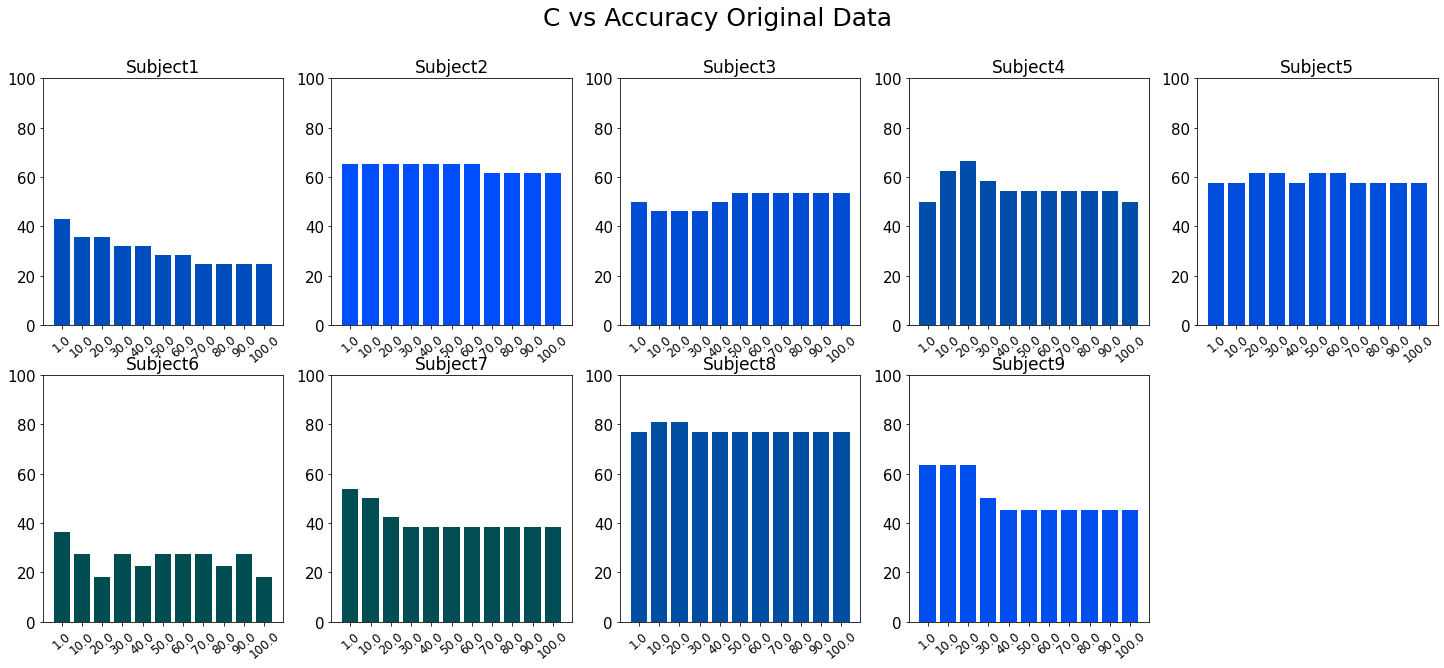

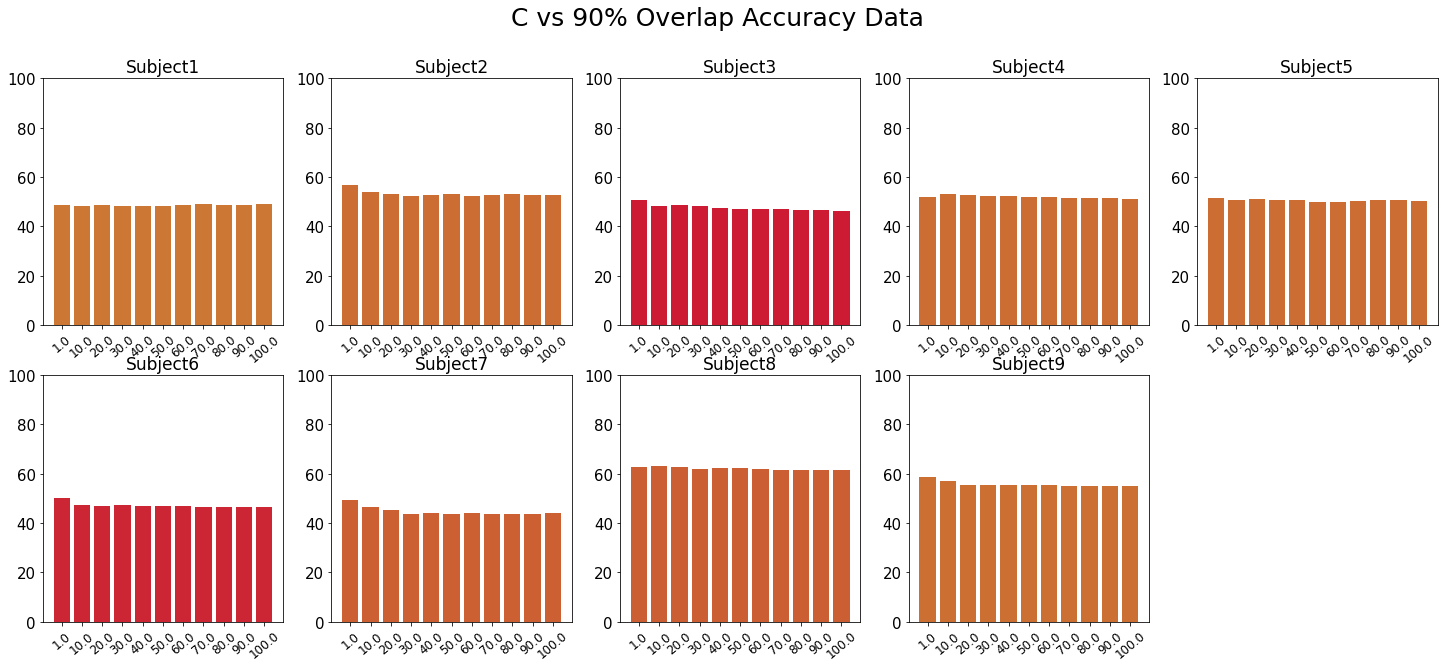

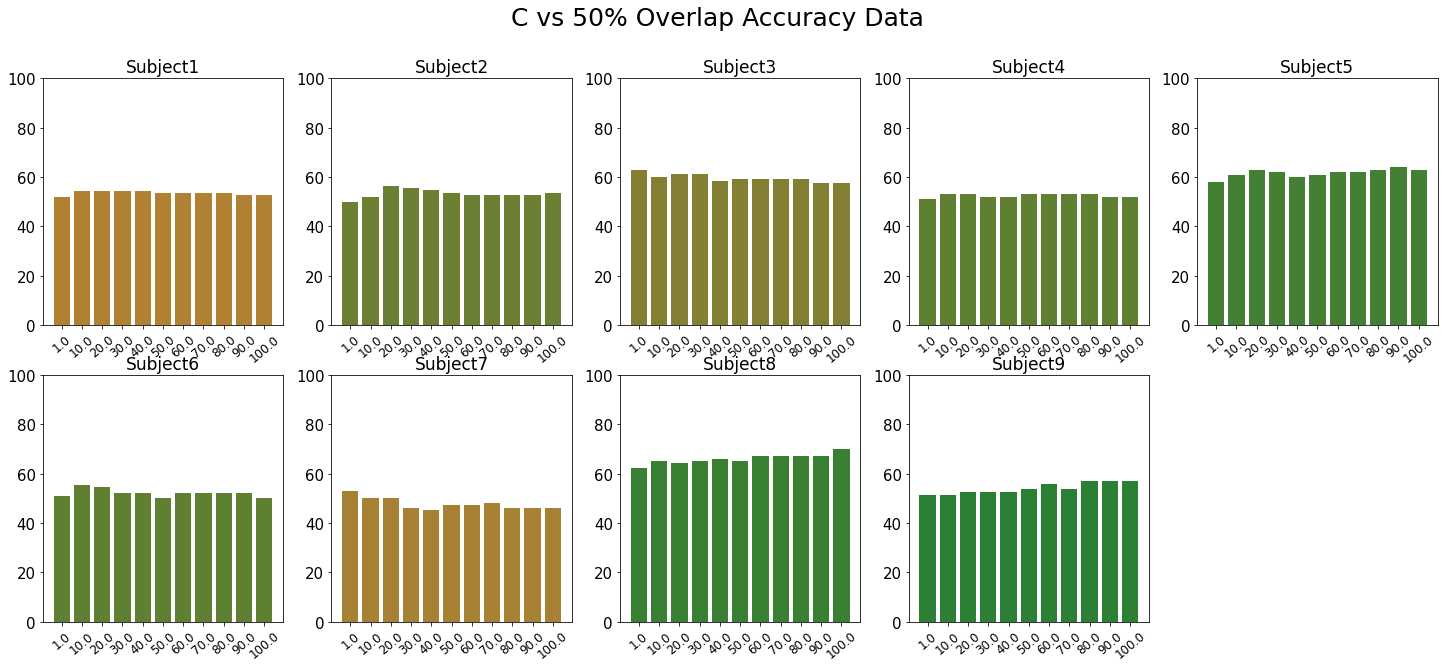

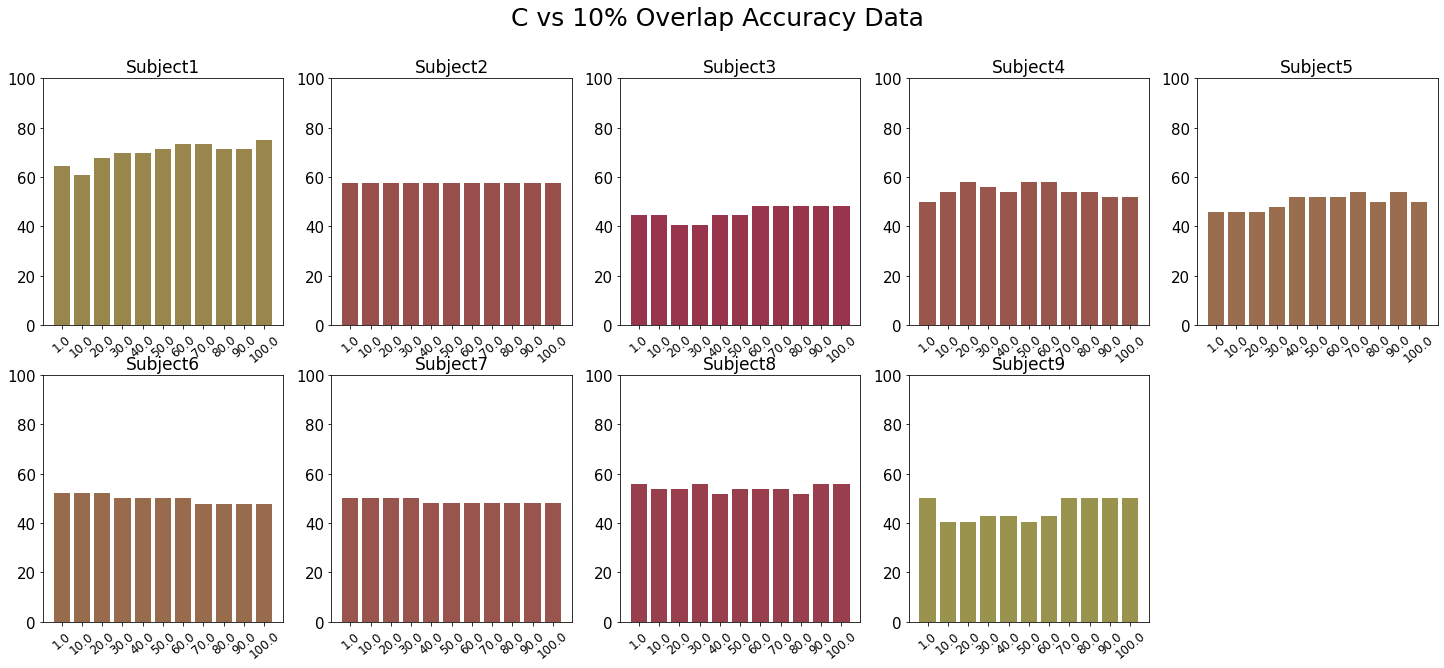

In [177]:
# ============== Original Data ====================
showFig(ol=None, idx=idx, CVal=Cval)

# ============== 90% Overlap Data =================
showFig(ol=90, idx=idx, CVal=Cval)

# ============== 50% Overlap Data =================
showFig(ol=50, idx=idx, CVal=Cval)

# ============== 10% Overlap Data ==================
showFig(ol=10, idx=idx, CVal=Cval)

Which subject to compare? (1-9):6


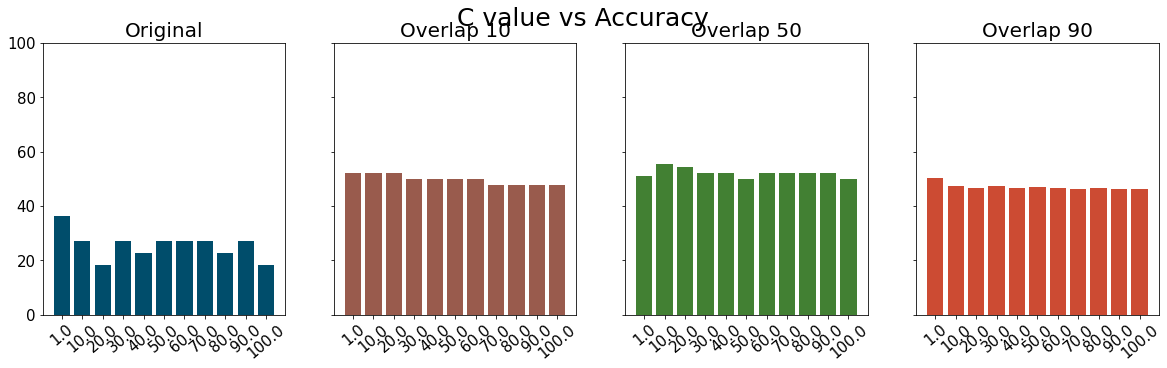

In [178]:
# ================ Comparing =====================

no = input('Which subject to compare? (1-9):')
res = globals()['res0' + str(no)]
res_ol10 = globals()['res0' + str(no) + '_ol10']
res_ol50 = globals()['res0' + str(no) + '_ol50']
res_ol90 = globals()['res0' + str(no) + '_ol90']


# ======== Data 1 ========
fig_comp, ax = plt.subplots(1, 4, sharey = True, figsize=(20, 5))
fig_comp.suptitle('C value vs Accuracy', fontsize=25)

co1 = (0, 0.3, np.random.uniform(0.2, 1))

ax[0].bar(idx, res[:, 1], color=co1)
ax[0].set_title('Original', fontsize=20)
ax[0].set_xticks(idx)
ax[0].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[0].set_ylim(0, 100)
ax[0].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 2 ========
co2 = (0.6, np.random.uniform(0.2, 0.6), 0.3)

ax[1].bar(idx, res_ol10[:, 1], color=co2)
ax[1].set_title('Overlap 10', fontsize=20)
ax[1].set_xticks(idx)
ax[1].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[1].set_ylim(0, 100)
ax[1].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 3 ==========

co3 = (np.random.uniform(0.1, 0.7), 0.5, 0.2)

ax[2].bar(idx, res_ol50[:, 1], color=co3)
ax[2].set_title('Overlap 50', fontsize=20)
ax[2].set_xticks(idx)
ax[2].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[2].set_ylim(0, 100)
ax[2].set_yticklabels(np.arange(0, 101, 20), fontsize=15)

# ======== Data 4 ======== 
co4 = (0.8, np.random.uniform(0.1, 0.5), 0.2) # Ramdomize color

ax[3].bar(idx, res_ol90[:, 1], color=co4)
ax[3].set_title('Overlap 90', fontsize=20)
ax[3].set_xticks(idx)
ax[3].set_xticklabels(Cval, rotation=40, fontsize=15)

ax[3].set_ylim(0, 100)
ax[3].set_yticklabels(np.arange(0, 101, 20), fontsize=15)



plt.show()

## Signal Visualization

Step:  
1. Grab the number of samples shown in figure below in each trial 
2. Store them into left and right array for each subject, each containing C3 and C4
3. Average over all trials
4. Plot the signal

![vis-eeg-clip1](./img/vis-eeg-clip.png)

In [179]:
fs, ns, cue_dur, mi_dur

(250, 9, 313, 688)

In [180]:
print('The amount of samples to be clipped:', mi_dur+cue_dur+125)

The amount of samples to be clipped: 1126


In [181]:
pos01_l.shape[0]

69

In [182]:
# Fetch 1126 samples of each event from sample_data
# Now we are ready to take 1126 samples of left and right
# Subject 01-09
for i in range(1, 10):    
    E_l_vis = 'E0' + str(i) + '_l_vis'
    E_r_vis = 'E0' + str(i) + '_r_vis'
    
    pos_l = globals()['pos0' + str(i) + '_l']
    pos_r = globals()['pos0' + str(i) + '_r']
    
    sample = globals()['sample_data0' + str(i)]
        
    # This will initialize array shape trial x sample x electrode
    globals()[E_l_vis] = np.zeros([pos_l.shape[0], mi_dur+cue_dur+125, sample.shape[1]])
    globals()[E_r_vis] = np.zeros([pos_r.shape[0], mi_dur+cue_dur+125, sample.shape[1]])

    for j in range(len(pos_l)):
        globals()[E_l_vis][j] = sample.iloc[pos_l[j]-125 : pos_l[j]+cue_dur+mi_dur, :]
        
    for k in range(len(pos_r)):
        globals()[E_r_vis][k] = sample.iloc[pos_r[k]-125 : pos_r[k]+cue_dur+mi_dur, :]

In [183]:
E05_l_vis.shape, E05_r_vis.shape 

((63, 1126, 22), (66, 1126, 22))

In [184]:
# Convert them to N x T array, N = electrodes, T = samples
for i in range(1, ns+1):
    E_l = globals()['E0' + str(i) + '_l_vis']
    E_r = globals()['E0' + str(i) + '_r_vis']
    
    E_l_trans = 'E0' + str(i) + '_l_vis'
    E_r_trans = 'E0' + str(i) + '_r_vis'

    if (E_l.shape[1] != 22 and E_r.shape[1] != 22):
        globals()[E_l_trans] = np.transpose(E_l, (0, 2, 1))
        globals()[E_r_trans] = np.transpose(E_r, (0, 2, 1))

In [185]:
E01_l_vis.shape, E01_r_vis.shape

((69, 22, 1126), (69, 22, 1126))

### Divide into left class and right class, containing C3 and C4

In [186]:
# Diving them by left and right class
# So left and right class will be array of one subject containing all trials consist of C3 and C4
# Dimension of array trial x electrodes x samples

# Preparing array
for i in range(1, ns+1):
    left_vis = 'left0' + str(i) + '_vis'
    right_vis = 'right0' + str(i) + '_vis'
    
    E_l_vis = globals()['E0' + str(i) + '_l_vis']
    E_r_vis = globals()['E0' + str(i) + '_r_vis']
    
    globals()[left_vis] = np.zeros([E_l_vis.shape[0], 2, E_l_vis.shape[2]])
    globals()[right_vis] = np.zeros([E_r_vis.shape[0], 2, E_r_vis.shape[2]])
    
# Grab necessary index 
for i in range(1, ns+1):
    left_vis = globals()['left0' + str(i) + '_vis']
    right_vis = globals()['right0' + str(i) + '_vis']
    
    E_l_vis = globals()['E0' + str(i) + '_l_vis']
    E_r_vis = globals()['E0' + str(i) + '_r_vis']

    for j in range(left_vis.shape[0]):
        left_vis[j] = np.vstack((E_l_vis[j, 7, :], E_l_vis[j, 11, :]))
    
    for k in range(right_vis.shape[0]):
        right_vis[k] = np.vstack((E_r_vis[k, 7, :], E_r_vis[k, 11, :])) 

In [187]:
left01_vis.shape, right01_vis.shape

((69, 2, 1126), (69, 2, 1126))

In [188]:
dframe(left01_vis[0], index=['C3', 'C4'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Averaging over all trials

In [189]:
# Try averaging over all trials within subject
# Expected array per subject 2 x 1126

for i in range(1, ns+1):
    left_vis_avg = 'left0' + str(i) +'_vis_avg'
    right_vis_avg = 'right0' + str(i) + '_vis_avg'
    
    left_vis = globals()['left0' + str(i) + '_vis']
    right_vis = globals()['right0' + str(i) + '_vis']    
    
    globals()[left_vis_avg] = np.mean(left_vis, axis=0)
    globals()[right_vis_avg] = np.mean(right_vis, axis=0)    

In [190]:
left01_vis_avg.shape, right01_vis_avg.shape

((2, 1126), (2, 1126))

In [191]:
dframe(left03_vis_avg, index=['C3', 'C4'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Plotting Data

In [192]:
# Create ticks for x axis
idx = np.arange(len(left01_vis_avg[0]))

# Convert sample to time, divide by fs
xax = idx/fs

Which subject (1...9)? 3
Which side (left/right)? left


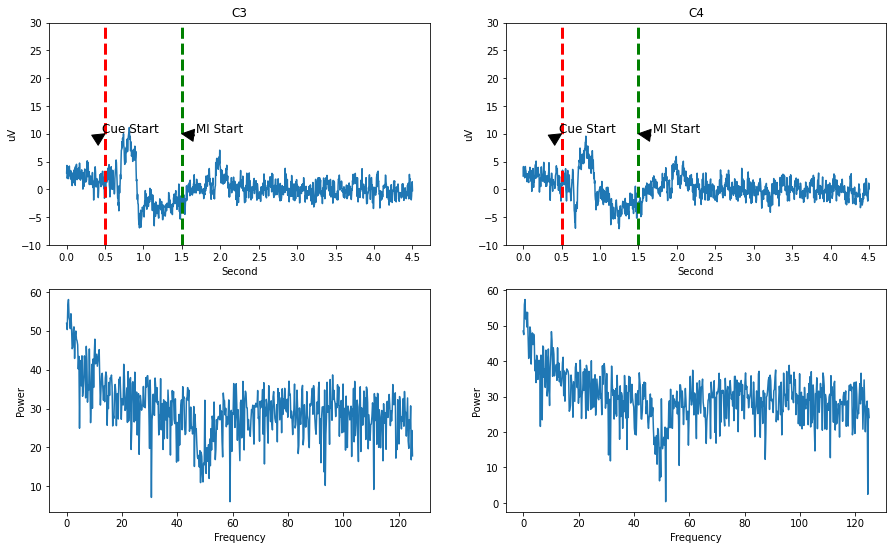

In [193]:
# import pylab as pl
no = input('Which subject (1...9)? ')
side = input('Which side (left/right)? ')

data = globals()[side + '0' + str(no) + '_vis_avg']
figure = plt.figure(figsize = (15, 9))

# ================== C3 =========================
ax1 = figure.add_subplot(221)
ax1.set_title('C3')
ax1.plot(xax, data[0])
ax1.plot([0.5]*50, range(-10, 40), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-10, 40), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-10,ymax=30)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV')

ax2 = figure.add_subplot(223)
p = 20*np.log10(np.abs(np.fft.rfft(data[0])))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')


# =================== C4 ==========================
ax1 = figure.add_subplot(222)
ax1.set_title('C4')
ax1.plot(xax, data[1])
ax1.plot([0.5]*50, range(-10, 40), linewidth = 3, c='r', linestyle='dashed')
ax1.plot([1.5]*50, range(-10, 40), 'g--', linewidth = 3)

ax1.set_xticks(np.arange(0, 5, 0.5))
ax1.axis(ymin=-10,ymax=30)

ax1.annotate('Cue Start', xy=(0.5, 10),  xycoords='data',
            xytext=(1.2, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.annotate('MI Start', xy=(1.5, 10),  xycoords='data',
            xytext=(2.3, 12),
            arrowprops=dict(facecolor='black', width=1),
            horizontalalignment='right', verticalalignment='top',
            size=12)
ax1.set_xlabel('Second')
ax1.set_ylabel('uV')

ax2 = figure.add_subplot(224)
p = 20*np.log10(np.abs(np.fft.rfft(data[1])))
f = np.linspace(0, fs/2, len(p))

ax2.plot(f, p)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')

plt.savefig('eeg-signal-time-series-subject0' + str(no) + '_' + str(side) + '.png')

plt.show()

## PSD
Step
1. Check the previous array containing trial data with dimension trial x no. electrodes x samples
2. Grab `n` samples from C3 and C4 only, now array shape should be trial x 2 x samples
3. Average over all trials
4. Find out how to calculate the PSD 
4. Create two figures C3 and C4 of each subject
5. On one figure, plot left and right class

6. Should I average over all trials?

`n` = duration of MI task

![montage](./img/montage.png)
![psd-eeg-clip](./img/psd-eeg-clip.png)

In [194]:
# The trial array from previous computation are E_left and E_right
# This data already contains MI_task samples
E01_left.shape, E01_right.shape

((69, 22, 688), (69, 22, 688))

### Baseline data
The baseline data is used as a comparison to observed data (ERD and ERS).  
In this experiment, baseline data is defined as duration from fixation cross to cue onset (2 sec)

In [195]:
def takeClean768(prop):
    # First take clean 768 of left and right data, st means start of fixation
    idx_left_st = np.argwhere(np.diff(prop[:, 0])==1).flatten() # Index of clean left data
    idx_right_st = np.argwhere(np.diff(prop[:, 0])==2).flatten() # Index of clean right data
    
    # Then take the position of those index
    pos_left_st = prop[idx_left_st, 1]
    pos_right_st = prop[idx_right_st, 1]

    return pos_left_st, pos_right_st

In [196]:
# Get position of starting point of clean left and right classes
for i in range(1, ns+1):
    pos_l_st = 'pos0' + str(i) + '_l_st'
    pos_r_st = 'pos0' + str(i) + '_r_st'
    
    prop = globals()['prop0' +  str(i)]
    
    globals()[pos_l_st], globals()[pos_r_st] = takeClean768(prop)

In [197]:
pos09_l_st.shape, pos09_r_st.shape

((53,), (63,))

In [198]:
# Duration of basline data is 2 seconds which is 500 samples
bs_dur = 2*fs

In [199]:
E09_right.shape

(63, 22, 688)

In [200]:
# Preparing the variable
for i in range(1, ns+1):
    E_left = globals()['E0' + str(i) +'_left']
    E_right = globals()['E0' + str(i) +'_right']  
    
    E_left_base = 'E0' + str(i) +'_l_bs'
    E_right_base = 'E0' + str(i) +'_r_bs'
    
    globals()[E_left_base] = np.zeros([E_left.shape[0], bs_dur, E_left.shape[1]])
    globals()[E_right_base] = np.zeros([E_right.shape[0], bs_dur, E_right.shape[1]])

In [201]:
E09_r_bs.shape

(63, 500, 22)

In [202]:
pos01_l_st

array([ 97742,  99750, 111663, 113558, 115530, 123569, 125635, 129737,
       139783, 154031, 168276, 186376, 188704, 190707, 200613, 208498,
       214309, 228642, 238579, 244662, 250866, 261176, 283211, 297448,
       299498, 313111, 321341, 333453, 345594, 347701, 353927, 363871,
       375873, 380046, 384377, 386295, 398264, 402168, 404063, 430288,
       442429, 446628, 450762, 454846, 458781, 468874, 481212, 489201,
       491118, 504814, 529084, 537193, 541371, 545554, 547597, 549661,
       551681, 571657, 576044, 599705, 622005, 625919, 632002, 636099,
       642389, 646496, 654376, 662544, 666378])

In [203]:
# Taking 500 data from each trial
for i in range(1, ns+1):
    E_left_base = globals()['E0' + str(i) +'_l_bs']
    E_right_base = globals()['E0' + str(i) +'_r_bs']
    
    sample_data = globals()['sample_data0' + str(i)]
    
    pos_l_st = globals()['pos0' + str(i) + '_l_st']
    pos_r_st = globals()['pos0' + str(i) + '_r_st']
    
    for j in range(pos_l_st.shape[0]):
        E_left_base[j] = sample_data.iloc[pos_l_st[j]: pos_l_st[j]+bs_dur, :]
    
    for k in range(pos_r_st.shape[0]):
        E_right_base[k] = sample_data.iloc[pos_r_st[k]: pos_r_st[k]+bs_dur, :] 

In [204]:
# === Transpose array so that dimension is trial x no elec x sample ====
for i in range(1, ns+1):
    E_left_base = globals()['E0' + str(i) +'_l_bs']
    E_right_base = globals()['E0' + str(i) +'_r_bs']
    
    E_left_base_tr = 'E0' + str(i) +'_l_bs'
    E_right_base_tr = 'E0' + str(i) +'_r_bs'

    globals()[E_left_base_tr] = np.transpose(E_left_base, (0, 2, 1))
    globals()[E_right_base_tr] = np.transpose(E_right_base, (0, 2, 1))    

In [205]:
E09_l_bs.shape, E09_r_bs.shape

((53, 22, 500), (63, 22, 500))

In [206]:
# ==== Baseline corresponds C3 and C4 =========
# ==== In case when trial left != trial right, pick smallest tiral numbers
# index 7 and 11 from each E_bs data
# Create array to store data
for i in range(1, ns+1):
    C3_bs = 'C3_0' + str(i) + '_bs'
    C4_bs = 'C4_0' + str(i) + '_bs'
    
    # Choosing size of trials
    E_left = globals()['E0' + str(i) + '_left']
    E_right = globals()['E0' + str(i) + '_right']
    
    if E_left.shape[0] != E_right.shape[0]:
        if E_left.shape[0] < E_right.shape[0]:
            n = E_left.shape[0]
        else:
            n = E_right.shape[0]
    else:
        n = E_left.shape[0]
    
    # Preparing C3 and C4
    globals()[C3_bs] = np.zeros([n, 2, bs_dur])
    globals()[C4_bs] = np.zeros([n, 2, bs_dur])

In [207]:
C3_09_bs.shape, C4_09_bs.shape

((53, 2, 500), (53, 2, 500))

In [208]:
# Taking only index 7 and 11 of left and right class
for i in range(1, ns+1):
    # Choosing size of trials
    E_left = globals()['E0' + str(i) + '_left']
    E_right = globals()['E0' + str(i) + '_right']
    
    if E_left.shape[0] != E_right.shape[0]:
        if E_left.shape[0] < E_right.shape[0]:
            n = E_left.shape[0]
        else:
            n = E_right.shape[0]
    else:
        n = E_left.shape[0]
    
    C3_bs = globals()['C3_0' + str(i) + '_bs']
    C4_bs = globals()['C4_0' + str(i) + '_bs']
    
    E_l_bs = globals()['E0' + str(i) + '_l_bs']
    E_r_bs = globals()['E0' + str(i) + '_r_bs']
    
    for j in range(n):
        C3_bs[j] = np.vstack((E_l_bs[j, 7, :], E_r_bs[j, 7, :]))
        C4_bs[j] = np.vstack((E_l_bs[j, 11, :], E_r_bs[j, 11, :])) 

In [209]:
dframe(C3_09_bs[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,10.644531,10.791016,6.542969,3.173828,3.955078,1.318359,-2.392578,-2.294922,-7.470703,-9.326172,-17.968750,-22.509766,-33.593750,-39.599609,-42.773438,-48.583984,-44.677734,-35.986328,-35.058594,-18.066406,-8.496094,-6.396484,-4.589844,-6.542969,-3.369141,-1.123047,-6.787109,-9.033203,-11.035156,-10.546875,-10.009766,-7.958984,-12.646484,-17.529297,-21.386719,-22.509766,-28.320312,-31.933594,-36.914062,-33.886719,-28.710938,-24.951172,-21.728516,-23.339844,-15.527344,-16.455078,-14.794922,-14.111328,-13.378906,-5.517578,-5.957031,-8.349609,-4.687500,-7.666016,-0.244141,2.685547,2.294922,-7.666016,-17.675781,-21.044922,-20.605469,-23.193359,-14.404297,-10.595703,-6.787109,-4.345703,-4.638672,-7.421875,-8.349609,-7.763672,-3.906250,-8.398438,-4.638672,-7.666016,-5.029297,-1.416016,-4.492188,-8.349609,-18.066406,-21.240234,-23.193359,-24.072266,-21.240234,-16.503906,-10.351562,-6.542969,-5.859375,-3.515625,-9.619141,-4.101562,-6.542969,-5.908203,-7.275391,-9.082031,-3.173828,-1.220703,1.171875,0.048828,-5.468750,-1.708984,-10.791016,-11.865234,-8.544922,-8.203125,1.123047,7.519531,13.671875,12.841797,16.308594,19.726562,18.066406,20.898438,14.306641,8.740234,9.960938,5.957031,2.099609,-1.611328,-8.251953,-10.888672,-14.501953,-28.955078,-35.009766,-48.925781,-43.261719,-40.332031,-23.974609,-15.185547,-14.648438,-3.613281,-3.369141,-3.955078,2.734375,2.197266,6.835938,7.861328,3.466797,4.492188,0.585938,10.839844,15.869141,12.109375,10.888672,-0.097656,-6.640625,-19.335938,-21.484375,-14.648438,-5.224609,6.542969,21.533203,23.583984,20.166016,18.212891,19.628906,26.660156,25.78125,25.390625,21.191406,20.849609,14.160156,12.402344,10.15625,7.519531,10.449219,9.082031,2.539062,-7.519531,-15.478516,-17.968750,-9.033203,-7.080078,-0.195312,-2.880859,4.199219,6.103516,10.693359,12.597656,12.792969,19.921875,18.164062,17.724609,16.552734,7.666016,6.054688,3.808594,-3.857422,-14.257812,-19.775391,-22.216797,-24.902344,-17.529297,-8.300781,-6.884766,-3.564453,-0.146484,1.757812,4.492188,6.835938,9.326172,19.091797,24.21875,20.556641,17.626953,23.046875,12.207031,7.910156,-0.439453,

### Divide C3 and C4 each subject, containing MI task data of left and right
According to the datasheet, electrodes number 8 and 12 corespond to electrodes C3 and C4.   
Grab electrodes number 8 and 12 from data E_left and E_right.  
  
*Note that in python index starts at 0, thus 8 = 7, 12 = 11*

In [210]:
# Grab index 7 and 11 from each E data
# Create array to store data
for i in range(1, ns+1):
    C3 = 'C3_0' + str(i)
    C4 = 'C4_0' + str(i)
    
    # Choosing size of trials
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    if E_l.shape[0] != E_r.shape[0]:
        if E_l.shape[0] < E_r.shape[0]:
            n = E_l.shape[0]
        else:
            n = E_r.shape[0]
    else:
        n = E_l.shape[0]
    
    globals()[C3] = np.zeros([n, 2, E_l.shape[2]])
    globals()[C4] = np.zeros([n, 2, E_l.shape[2]])

# Taking index 7 and 11 from each trial 
for i in range(1, ns+1):
    C3 = globals()['C3_0' + str(i)]
    C4 = globals()['C4_0' + str(i)]
    
    E_l = globals()['E0' + str(i) + '_left']
    E_r = globals()['E0' + str(i) + '_right']
    
    for j in range(n):
        C3[j] = np.vstack((E_l[j, 7, :], E_r[j, 7, :]))
        C4[j] = np.vstack((E_l[j, 11, :], E_r[j, 11, :])) 

In [211]:
C3_09.shape, C4_09.shape

((53, 2, 688), (53, 2, 688))

In [212]:
dframe(C3_01[0], index=['left', 'right'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687
left,13.134766,14.794922,14.160156,18.457031,10.107422,14.013672,9.912109,16.162109,10.400391,8.154297,13.232422,5.664062,8.837891,3.369141,6.689453,-0.292969,1.123047,-1.904297,4.296875,0.390625,3.662109,3.710938,12.255859,4.150391,2.441406,7.568359,-3.125000,-0.732422,-1.025391,4.296875,-0.244141,4.296875,2.929688,4.980469,0.292969,2.783203,-1.220703,1.513672,7.080078,11.669922,8.154297,8.886719,3.564453,0.195312,-7.519531,-5.957031,-0.537109,0.781250,2.587891,2.685547,6.494141,12.060547,15.234375,16.357422,15.283203,14.062500,7.275391,9.521484,8.447266,8.886719,7.617188,5.371094,7.128906,0.976562,5.566406,10.937500,12.451172,12.304688,15.429688,15.380859,12.158203,12.158203,6.787109,7.226562,0.634766,0.195312,2.832031,9.716797,15.673828,16.015625,16.601562,12.158203,15.771484,13.769531,20.703125,21.337891,30.419922,27.197266,24.707031,29.980469,21.191406,19.091797,14.990234,20.410156,16.552734,15.283203,12.402344,10.888672,1.171875,6.640625,8.789062,10.888672,18.212891,24.707031,17.529297,19.531250,15.380859,15.722656,15.234375,10.937500,11.230469,8.496094,8.935547,4.785156,4.833984,-2.294922,-8.935547,-10.156250,-12.060547,-13.720703,-12.109375,-4.150391,3.076172,2.490234,4.638672,2.783203,-1.025391,-2.050781,-7.519531,-1.806641,-4.882812,-6.835938,-3.955078,-2.246094,-2.050781,0.390625,-4.687500,-6.152344,-15.820312,-13.720703,-14

### Average over all trials

In [213]:
# ==== MI task data =========
for i in range(1, ns+1):
    C3 = globals()['C3_0' + str(i)]
    C4 = globals()['C4_0' + str(i)]
    
    C3_avg = 'C3_0' + str(i) + '_avg'
    C4_avg = 'C4_0' + str(i) + '_avg'

    globals()[C3_avg] = np.mean(C3, axis=0)
    globals()[C4_avg] = np.mean(C4, axis=0)

In [214]:
C3_01_avg.shape, C4_01_avg.shape

((2, 688), (2, 688))

In [215]:
# ==== Baseline data =========
for i in range(1, ns+1):
    C3_bs = globals()['C3_0' + str(i) + '_bs']
    C4_bs = globals()['C4_0' + str(i) + '_bs']
    
    C3_bs_avg = 'C3_0' + str(i) + '_bs_avg'
    C4_bs_avg = 'C4_0' + str(i) + '_bs_avg'

    globals()[C3_bs_avg] = np.mean(C3_bs, axis=0)
    globals()[C4_bs_avg] = np.mean(C4_bs, axis=0)

In [216]:
C3_01_bs_avg.shape, C4_01_bs_avg.shape

((2, 500), (2, 500))

In [217]:
dframe(C3_03_bs_avg)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-2.076631,-2.190085,-2.666159,-0.491872,-2.568503,-2.264045,0.288660,-2.214499,-2.004825,-0.509823,-0.058881,-0.26281,-1.584042,-1.953843,-2.420582,-3.182445,-1.456227,-2.594353,-1.110840,-1.668773,-2.661133,-3.015855,-4.074994,-4.638672,-7.454188,-4.745663,-4.821059,-3.820083,-3.907686,-2.428481,-3.254251,-1.467716,-3.749713,-3.124282,-4.839011,-4.839729,-6.216969,-6.111414,-5.63175,-7.384536,-5.848604,-8.622472,-8.192354,-8.585133,-5.074535,-4.619284,-2.230296,0.004308,0.223317,0.439453,3.308824,4.736328,6.888356,6.306009,9.069106,9.720387,9.315401,8.836455,10.001867,7.671042,7.895795,7.831170,6.172449,7.622214,4.563276,4.672421,3.277229,1.899989,3.344727,2.706371,2.141257,1.132382,0.602453,0.958611,1.461253,1.674517,1.898552,0.041648,-0.573730,-0.835105,0.397806,-0.034467,1.281738,-0.878906,2.084530,0.084731,-0.026568,1.991182,-0.379136,-0.777660,-0.159409,0.595272,-0.533519,1.948817,1.212804,1.087144,1.018210,1.054831,0.861673,0.310920,1.023236,1.907887,0.720215,0.713034,0.384162,0.635484,-0.643382,1.353544,-0.259938,-0.655589,0.608197,0.926298,0.890395,-0.099092,1.296099,1.207060,-1.097197,0.104119,1.835363,1.244399,2.350213,0.340361,0.665642,-0.456687,-0.313074,1.818130,0.253475,1.026109,2.386116,1.313333,1.845416,2.870088,2.765970,3.231991,1.680980,0.674259,1.127355,1.607738,0.084731,0.603889,4.324879,2.561322,2.017032,3.333956,1.677390,1.474179,1.393756,0.940659,1.855469,-1.006721,1.847570,1.632152,-1.377240,0.387753,0.734576,0.357594,0.612506,-0.498334,-0.570858,-0.483255,0.022978,-0.705854,-1.423914,-1.095043,-1.400936,-0.814281,-1.995491,0.303022,-0.652717,0.628303,0.011489,-0.245577,-0.791303,0.039493,-1.688161,-0.595272,-1.095761,-1.296099,-0.159409,-0.525620,-0.362621,-1.299690,0.998104,-0.089758,0.362621,0.306612,2.050781,0.112017,0.211110,-1.143871,0.020824,-0.172335,-0.542136,0.587374,0.326718,0.494026,0.232652,0.318101,-1.354262,-0.209674,-0.693647,-1.404527,0.579475,0.569422,0.513413,0.179515,2.260455,1.553883,1.898552,1.642923,0.893986,1.349236,2.094583,3.491929,2.255429,3.351189,3.246352,0.885369,1.366469,0.780532,3.193934,2.908146,1.969640,4.315545,

### Plot PSD

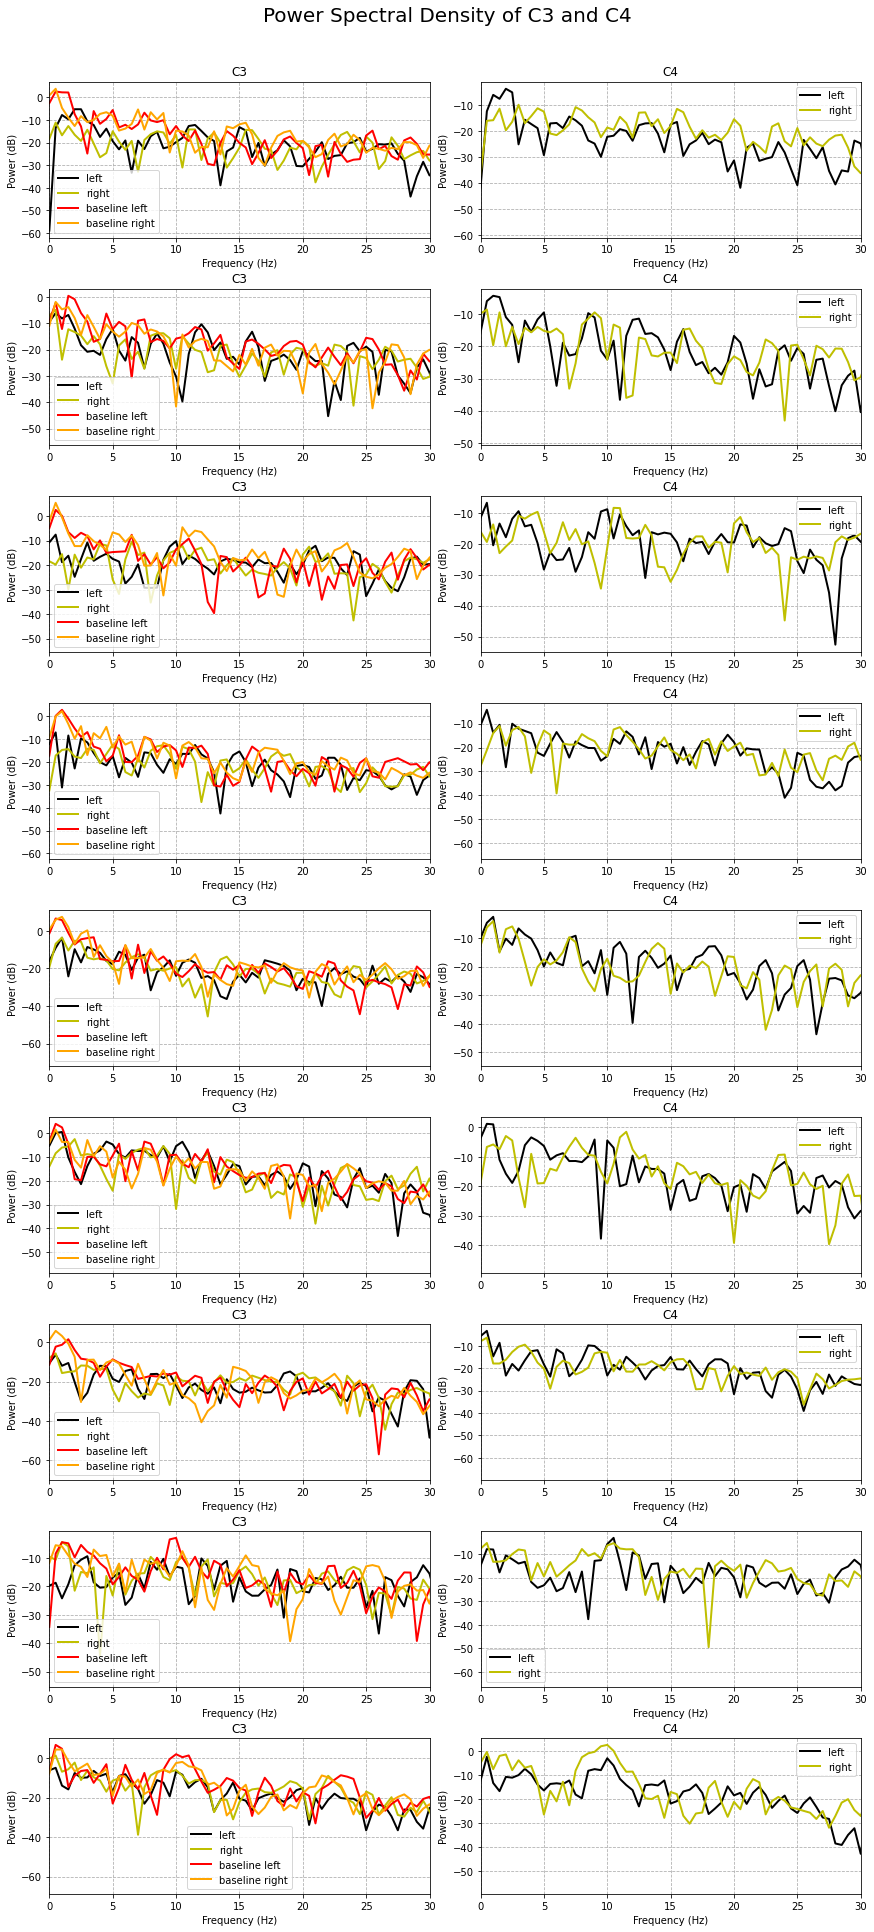

In [219]:
# Without the baseline
from scipy import signal

fs = 250
band=[0, 30]
win= 2*fs

# Initialize figure and axes
fig, ax = plt.subplots(9, 2, figsize=(12, 28))
fig.suptitle('Power Spectral Density of C3 and C4', fontsize=20)
fig.tight_layout(h_pad=3, w_pad=2, rect=[0, 0.03, 1, 0.95])

# Iterate over all subject 1-9
for i in range(9):
    C3_avg = globals()['C3_0'+ str(i+1) +'_avg']
    C4_avg = globals()['C4_0'+ str(i+1) +'_avg']
    
    C3_bs_avg = globals()['C3_0' + str(i+1) + '_bs_avg']
    C4_bs_avg = globals()['C4_0' + str(i+1) + '_bs_avg']
    
    # index for column
    j = 0
    # C3, left data and baseline
    freq_l, psd_l = signal.welch(C3_avg[0], fs, nperseg=win)
    freq_l_bs, psd_l_bs = signal.welch(C3_bs_avg[0], fs, nperseg=win)

    
    # C3, right data and baseline
    freq_r, psd_r = signal.welch(C3_avg[1], fs, nperseg=win)
    freq_r_bs, psd_r_bs = signal.welch(C3_bs_avg[1], fs, nperseg=win)

    
    # convert to db
    psd_l = 10 * np.log10(psd_l)
    psd_l_bs = 10 * np.log10(psd_l_bs)
    psd_r = 10 * np.log10(psd_r)
    psd_r_bs = 10 * np.log10(psd_r_bs)


    ax[i, j].set_title('C3')
    # left and right data
    ax[i, j].plot(freq_l, psd_l, c='k', lw=2, label='left')
    ax[i, j].plot(freq_r, psd_r, c='y', lw=2, label='right')

    # left and right baseline data
    ax[i, j].plot(freq_l, psd_l_bs, c='red', lw=2, label='baseline left')
    ax[i, j].plot(freq_r, psd_r_bs, c='orange', lw=2, label='baseline right')
    
    ax[i, j].set_xlabel('Frequency (Hz)')
    ax[i, j].set_xlim(band)
    # plt.xticks(np.arange(0, np.max(freq_C3_l)+1, step=5))
    ax[i, j].set_ylabel('Power (dB)')
    ax[i, j].grid(linestyle='--')
    ax[i, j].legend()

    # C4
    freq_l, psd_l = signal.welch(C4_avg[0], fs, nperseg=win)
    freq_r, psd_r = signal.welch(C4_avg[1], fs, nperseg=win)

    # convert to db
    psd_l = 10 * np.log10(psd_l)
    psd_r = 10 * np.log10(psd_r)

    ax[i, j+1].set_title('C4')
    ax[i, j+1].plot(freq_l, psd_l, c='k', lw=2, label='left')
    ax[i, j+1].plot(freq_r, psd_r, c='y', lw=2, label='right')
    ax[i, j+1].set_xlabel('Frequency (Hz)')
    ax[i, j+1].set_xlim(band)
    # plt.xticks(np.arange(0, np.max(freq_C3_l)+1, step=5))
    ax[i, j+1].set_ylabel('Power (dB)')
    ax[i, j+1].grid(linestyle='--')
    ax[i, j+1].legend()

In [ ]:
# With the baseline
from scipy import signal

fs = 250
band=[0, 50]
win= 2*fs

# Initialize figure and axes
fig, ax = plt.subplots(9, 2, figsize=(12, 28))
fig.suptitle('Power Spectral Density of C3 and C4', fontsize=20)
fig.tight_layout(h_pad=3, w_pad=2, rect=[0, 0.03, 1, 0.95])

# Iterate over all subject 1-9
for i in range(9):
    C3_avg = globals()['C3_0'+ str(i+1) +'_avg']
    C4_avg = globals()['C4_0'+ str(i+1) +'_avg']
    
    C3_bs_avg = globals()['C3_0' + str(i+1) + '_bs_avg']
    C4_bs_avg = globals()['C4_0' + str(i+1) + '_bs_avg']
    
    # index for column
    j = 0
    # C3, left data and baseline
    freq_l, psd_l = signal.welch(C3_avg[0], fs, nperseg=win)
    freq_l_bs, psd_l_bs = signal.welch(C3_bs_avg[0], fs, nperseg=win)
    
    # C3, right data and baseline

    freq_r, psd_r = signal.welch(C3_avg[1], fs, nperseg=win)
    freq_r_bs, psd_r_bs = signal.welch(C3_bs_avg[1], fs, nperseg=win)

    
    # convert to db
    psd_l = 10 * np.log10(psd_l)
    psd_l_bs= 10 * np.log10(psd_l_bs)

    psd_r = 10 * np.log10(psd_r)
    psd_r_bs = 10 * np.log10(psd_r_bs)


    ax[i, j].set_title('C3')
    ax[i, j].plot(freq_l, psd_l, c='k', lw=2, label='left')
    ax[i, j].plot(freq_l_bs, psd_l_bs, c='#FF5533', lw=2, label='base_left')

    
    ax[i, j].plot(freq_r, psd_r, c='y', lw=2, label='right')
    ax[i, j].plot(freq_r_bs, psd_r_bs, c='#FF5588', lw=2, label='base_right')

    ax[i, j].set_xlabel('Frequency (Hz)')
    ax[i, j].set_xlim(band)
    # plt.xticks(np.arange(0, np.max(freq_C3_l)+1, step=5))
    ax[i, j].set_ylabel('Power (dB)')
    ax[i, j].grid(linestyle='--')
    ax[i, j].legend()

    # C4
    freq_l, psd_l = signal.welch(C4_avg[0], fs, nperseg=win)
    freq_r, psd_r = signal.welch(C4_avg[1], fs, nperseg=win)

    # convert to db
    psd_l = 10 * np.log10(psd_l)
    psd_r = 10 * np.log10(psd_r)

    ax[i, j+1].set_title('C4')
    ax[i, j+1].plot(freq_l, psd_l, c='k', lw=2, label='left')
    ax[i, j+1].plot(freq_r, psd_r, c='y', lw=2, label='right')
    ax[i, j+1].set_xlabel('Frequency (Hz)')
    ax[i, j+1].set_xlim(band)
    # plt.xticks(np.arange(0, np.max(freq_C3_l)+1, step=5))
    ax[i, j+1].set_ylabel('Power (dB)')
    ax[i, j+1].grid(linestyle='--')
    ax[i, j+1].legend()